# FINAL PROJECT 1

**Kelompok 3 - PYTN-KS11**
1. M. Haikal Febrian
2. Naurah Nadzifah Azizi
3. Nadia Syachrani
4. Muhammad Randy

## Introduction

### Latar belakang :
* Uber dan Lyft adalah dua perusahaan ridesharing yang semakin populer di seluruh dunia. Peningkatan penggunaan aplikasi ini memungkinkan orang untuk memesan transportasi tanpa perlu menunggu di jalan raya atau berhenti menyetop taksi. Kasus ini akan fokus pada data di kota Boston, Massachusetts, USA.
* Kasus ini dipilih karena ingin memahami faktor-faktor apa yang mempengaruhi harga perjalanan Uber dan Lyft di kota Boston, Massachusetts, USA. Dalam hal ini, regresi linier dapat digunakan untuk memodelkan hubungan antara variabel independen dan dependen, dan membantu menjawab pertanyaan ini.
* Dalam era digitalisasi dan perkembangan teknologi informasi, layanan taksi online semakin populer dan menjadi alternatif transportasi yang diminati masyarakat. Oleh karena itu, penting untuk memahami tren penggunaan layanan taksi online dan faktor-faktor apa saja yang mempengaruhi harga layanan tersebut.

### Data yang digunakan :
* Dataset yang digunakan adalah dataset Uber dan Lyft di kota Boston, Massachusetts, USA. Dataset ini tersedia di platform Kaggle dan terdiri dari 693.071 baris data dan 57 kolom. 
* Setiap baris merepresentasikan satu perjalanan yang dilakukan oleh pengguna layanan Uber atau Lyft di kota Boston. Kolom-kolom yang tersedia antara lain: nama layanan, waktu perjalanan, lokasi asal dan tujuan perjalanan, jarak perjalanan, dan harga yang dikenakan.
* Dataset ini merupakan hasil pengumpulan data dari tanggal 1 November 2018 hingga 30 November 2018.

### Tujuan :
* Tujuan yang ingin dicapai dari analisis ini adalah untuk memahami faktor-faktor apa saja yang mempengaruhi harga layanan Uber dan Lyft di kota Boston
* Membangun model prediksi harga layanan berdasarkan variabel-variabel yang relevan. 
* Hal ini dapat berguna bagi pengguna layanan taksi online dan pihak layanan itu sendiri untuk memahami bagaimana harga dibentuk dan menentukan strategi harga yang tepat.

### REGRESI LINEAR
* Regresi linear adalah salah satu metode statistik yang digunakan untuk menganalisis hubungan antara dua variabel kontinu, yaitu variabel independen (biasanya disebut sebagai variabel X) dan variabel dependen (biasanya disebut sebagai variabel Y). 
* Regresi linear berusaha untuk menemukan persamaan garis lurus yang dapat menjelaskan hubungan antara variabel independen dan dependen.
* Tujuan dari regresi linear adalah untuk memprediksi nilai variabel dependen berdasarkan nilai variabel independen yang diberikan, serta untuk memahami dan mengukur tingkat hubungan antara kedua variabel tersebut. 

### Regresi Linear berdasarkan dataset :
* Dalam dataset Uber dan Lyft di Boston tersebut, terdapat beberapa variabel yang dapat digunakan untuk memprediksi variabel target, yaitu harga tarif (fare_amount). Beberapa variabel tersebut antara lain jarak perjalanan (trip_distance), waktu tempuh (trip_duration), jumlah penumpang (passenger_count), dan sebagainya.
* Karena variabel target dalam kasus ini adalah numerik, yaitu harga tarif, maka regresi linear dapat digunakan untuk membangun model prediksi harga tarif berdasarkan variabel-variabel tersebut. 
* Model regresi linear dapat menemukan pola dan hubungan antara variabel independen (trip_distance, trip_duration, passenger_count, dll) dengan variabel dependen (price) dan digunakan untuk memprediksi harga tarif pada data testing.
* Oleh karena itu, regresi linear adalah pilihan yang tepat untuk kasus ini, karena model regresi linear dapat memberikan hasil prediksi yang akurat dan mudah diinterpretasi ketika kita ingin memprediksi harga tarif pada data baru berdasarkan variabel-variabel yang tersedia.

## Import Library
Melakukan import libraries yang digunakan dalam project ini

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import preprocessing 

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from datetime import datetime

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.feature_selection import RFE

from sklearn.impute import SimpleImputer
from sklearn import ensemble
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

## Data Loading
Melakukan loading dataset menggunakan library Pandas

In [2]:
# Melakukan loading dataset menggunakan library Pandas
df = pd.read_csv("rideshare_kaggle.csv", error_bad_lines=False)

In [3]:
# Melakukan pengaturan yakni tidak memberi batasan maksimal kolom yang ditampilkan
pd.set_option("display.max_columns", None)

In [4]:
# Melihat 5 baris teratas
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [5]:
# Mengecek detail kolom mulai dari jumlah, tipe data, dan data null
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

Terlihat terdapat atribut yang memiliki kesamaan atau dapat diwakilkan dengan atribut yang lain, dataset memiliki baris yang banyak yaitu 693071 baris, dan memiliki tipe data yang bervariasi yakni float, integer, dan object.

In [6]:
# Memeriksa Jumlah Baris dan Kolom
print("Shape of the data:",df.shape)

Shape of the data: (693071, 57)


In [7]:
# Mengelompokkan dan menghitung jumlah tipe berdasarkan kolom "name"
df.groupby(['cab_type'])['name'].value_counts()

cab_type  name        
Lyft      Lux             51235
          Lux Black       51235
          Lux Black XL    51235
          Lyft            51235
          Lyft XL         51235
          Shared          51233
Uber      Black SUV       55096
          UberXL          55096
          WAV             55096
          Black           55095
          Taxi            55095
          UberX           55094
          UberPool        55091
Name: name, dtype: int64

In [8]:
# Melihat statistik deskriptif pada data yang bertipe numerik
df.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.930710e+05,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,6.930710e+05,693071.000000,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,6.930710e+05,6.930710e+05,693071.000000,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05
mean,1.544046e+09,11.619137,17.794365,11.586684,16.545125,2.189430,1.013870,42.338172,-71.066151,39.584388,35.881222,0.008922,0.146076,0.741119,6.186253,8.469860,1.544049e+09,8.467970,45.040982,1.544050e+09,34.150736,1.544102e+09,41.614054,1.544050e+09,30.139824,1.544099e+09,31.656256,1010.094766,220.055853,0.686502,0.248908,8.467970,313.513635,1.544027e+09,1.544060e+09,0.579066,0.037374,1.544044e+09,33.457774,1.544042e+09,45.261313,1.544047e+09,29.731002,1.544048e+09,41.997343,1.544048e+09
std,6.891925e+05,6.948114,9.982286,0.492429,9.324359,1.138937,0.091641,0.047840,0.020302,6.726084,7.918707,0.026901,0.328938,0.138595,3.148223,5.289179,6.928244e+05,2.602888,5.996541,6.937921e+05,6.383163,6.922923e+05,7.666138,6.941699e+05,8.057468,6.927378e+05,9.142355,13.472899,99.102736,0.358534,0.474097,2.602888,27.953061,6.911393e+05,6.906634e+05,0.244705,0.055214,6.912028e+05,6.467224,6.901954e+05,5.645046,6.901353e+05,7.110494,6.871862e+05,6.936841,6.910777e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,12.130000,0.000000,0.000000,0.380000,0.450000,0.800000,1.543151e+09,0.717000,32.680000,1.543154e+09,17.850000,1.543234e+09,22.620000,1.543187e+09,11.810000,1.543234e+09,4.390000,988.090000,2.000000,0.000000,0.000000,0.717000,269.400000,1.543147e+09,1.543181e+09,0.090000,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000,42.350300,-71.081000,36.450000,31.910000,0.000000,0.000000,0.640000,3.410000,4.060000,1.543432e+09,8.432000,42.570000,1.543439e+09,30.170000,1.543489e+09,36.570000,1.543439e+09,27.700000,1.543478e+09,27.490000,999.820000,124.000000,0.370000,0.000000,8.432000,290.900000,1.543406e+09,1.543440e+09,0.300000,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,35.900000,0.000000,0.000000,0.710000,5.910000,7.550000,1.543756e+09,9.880000,44.680000,1.543788e+09,34.180000,1.543817e+09,40.950000,1.543788e+09,30.030000,1.543817e+09,30.690000,1009.250000,258.000000,0.820000,0.000000,9.880000,307.400000,1.543752e+09,1.543785e+09,0.680000,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000,42.364700,-71.054200,43.580000,40.080000,0.000000,0.000000,0.880000,8.410000,11.740000,1.544846e+09,9.996000,46.910000,1.544814e+09,38.730000,1.544836e+09,44.120000,1.544818e+09

In [9]:
# Melihat statistik deskriptif pada data yang bertipe object
df.describe(include='O')

,id,datetime,timezone,source,destination,cab_type,product_id,name,short_summary,long_summary,icon
count,693071,693071,693071,693071,693071,693071,693071,693071,693071,693071,693071
unique,693071,31350,1,12,12,2,13,13,9,11,7
top,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,2018-11-26 23:21:14,America/New_York,Financial District,Financial District,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,Overcast,Mostly cloudy throughout the day.,cloudy
freq,1,156,693071,58857,58851,385663,55096,55096,218895,202340,218895


## Data Cleaning
Bagian ini berisi proses penyiapan data berupa data cleaning sebelum dilakukan explorasi data lebih lanjut.

In [10]:
# Melakukan pengecekan duplikasi data
df.duplicated().sum()

0

In [11]:
# Check null values
print("Is there any null values in the data ? \n",df.isnull().values.any())

Is there any null values in the data ? 
 True


In [12]:
# Check total null values
df.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

Diperoleh terdapat 55095 baris yang merupakan nilai yang kosong. Untuk itu perlu dilakukan penanganan terhadap missing value ini.

In [13]:
# hitung total null values pada kolom price
null_price = df['price'].isnull().sum()

# hitung persentase total null values pada kolom price
total_rows = df.shape[0]  # total baris data
percent_null_price = round(null_price / total_rows * 100, 2)

print("Persentase total null values pada kolom price: ", percent_null_price, "%")

Persentase total null values pada kolom price:  7.95 %


In [14]:
55095/693071*100

7.949402009317949

In [15]:
df[['price']]

,price
0,5.0
1,11.0
2,7.0
3,26.0
4,9.0
...,...
693066,13.0
693067,9.5
693068,NaN
693069,27.0


In [16]:
# Mencari median dari price
med_price = df['price'].median()
med_price

13.5

In [17]:
# Mengisi kolom price yang NaN dengan median
df["price"].fillna(med_price, inplace = True)

In [18]:
# Check kembali total null values
df.isnull().sum()

id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatur

In [19]:
df[['price']]

,price
0,5.0
1,11.0
2,7.0
3,26.0
4,9.0
...,...
693066,13.0
693067,9.5
693068,13.5
693069,27.0


In [20]:
df['price'] = df['price'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        693071 non-null  int32  
 13 

## Explorasi Data

In [21]:
# Melihat statistik descriptif pada data numerik
df.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.930710e+05,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,6.930710e+05,693071.000000,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,6.930710e+05,6.930710e+05,693071.000000,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05
mean,1.544046e+09,11.619137,17.794365,11.586684,16.004450,2.189430,1.013870,42.338172,-71.066151,39.584388,35.881222,0.008922,0.146076,0.741119,6.186253,8.469860,1.544049e+09,8.467970,45.040982,1.544050e+09,34.150736,1.544102e+09,41.614054,1.544050e+09,30.139824,1.544099e+09,31.656256,1010.094766,220.055853,0.686502,0.248908,8.467970,313.513635,1.544027e+09,1.544060e+09,0.579066,0.037374,1.544044e+09,33.457774,1.544042e+09,45.261313,1.544047e+09,29.731002,1.544048e+09,41.997343,1.544048e+09
std,6.891925e+05,6.948114,9.982286,0.492429,8.964082,1.138937,0.091641,0.047840,0.020302,6.726084,7.918707,0.026901,0.328938,0.138595,3.148223,5.289179,6.928244e+05,2.602888,5.996541,6.937921e+05,6.383163,6.922923e+05,7.666138,6.941699e+05,8.057468,6.927378e+05,9.142355,13.472899,99.102736,0.358534,0.474097,2.602888,27.953061,6.911393e+05,6.906634e+05,0.244705,0.055214,6.912028e+05,6.467224,6.901954e+05,5.645046,6.901353e+05,7.110494,6.871862e+05,6.936841,6.910777e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.000000,0.020000,1.000000,42.214800,-71.105400,18.910000,12.130000,0.000000,0.000000,0.380000,0.450000,0.800000,1.543151e+09,0.717000,32.680000,1.543154e+09,17.850000,1.543234e+09,22.620000,1.543187e+09,11.810000,1.543234e+09,4.390000,988.090000,2.000000,0.000000,0.000000,0.717000,269.400000,1.543147e+09,1.543181e+09,0.090000,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000,42.350300,-71.081000,36.450000,31.910000,0.000000,0.000000,0.640000,3.410000,4.060000,1.543432e+09,8.432000,42.570000,1.543439e+09,30.170000,1.543489e+09,36.570000,1.543439e+09,27.700000,1.543478e+09,27.490000,999.820000,124.000000,0.370000,0.000000,8.432000,290.900000,1.543406e+09,1.543440e+09,0.300000,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,13.000000,2.160000,1.000000,42.351900,-71.063100,40.490000,35.900000,0.000000,0.000000,0.710000,5.910000,7.550000,1.543756e+09,9.880000,44.680000,1.543788e+09,34.180000,1.543817e+09,40.950000,1.543788e+09,30.030000,1.543817e+09,30.690000,1009.250000,258.000000,0.820000,0.000000,9.880000,307.400000,1.543752e+09,1.543785e+09,0.680000,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.000000,2.920000,1.000000,42.364700,-71.054200,43.580000,40.080000,0.000000,0.000000,0.880000,8.410000,11.740000,1.544846e+09,9.996000,46.910000,1.544814e+09,38.730000,1.544836e+09,44.120000,1.544818e+09

**Kesimpulan :**
* jarak terjauh yakni 7.86 miles dengan tarif maksimal yakni 97 dollar
* suhu rata-rata berada pada 39.58 derajat Fahrenheit
* rata-rata pemesanan Taksi Online berada pada jam 11

In [22]:
# Melihat statistik descriptif pada data kategorik
df.describe(include='O')

,id,datetime,timezone,source,destination,cab_type,product_id,name,short_summary,long_summary,icon
count,693071,693071,693071,693071,693071,693071,693071,693071,693071,693071,693071
unique,693071,31350,1,12,12,2,13,13,9,11,7
top,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,2018-11-26 23:21:14,America/New_York,Financial District,Financial District,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,Overcast,Mostly cloudy throughout the day.,cloudy
freq,1,156,693071,58857,58851,385663,55096,55096,218895,202340,218895


**Kesimpulan :**
* Terdapat 12 tempat asal dan tujuan
* Terdapat 2 merek taksi online pada dataset ini, yakni Uber dan Lyft
* Cuaca yang paling sering muncul yakni Overcast
* Rute paling banyak dipesan yakni Financial District

In [23]:
# Melakukan grouping pada atribut Merek dan Tarif untuk melihat rata-ratanya
mean_df = df[['cab_type','price']].groupby('cab_type').mean().sort_values(by='price', ascending=True)
mean_df

,price
cab_type,
Uber,15.167410
Lyft,17.054569


Diperoleh bahwa Merek Uber memiliki Tarif rata-rata yakni 15.17 dollars, sedangkan Lyft yaitu 17.05 dollars

In [24]:
# Melakukan crosstab pada atribut Merek dan Produk untuk melihat proporsi dataset
pd.crosstab(df.cab_type, df.name)

name,Black,Black SUV,Lux,Lux Black,Lux Black XL,Lyft,Lyft XL,Shared,Taxi,UberPool,UberX,UberXL,WAV
cab_type,,,,,,,,,,,,,
Lyft,0,0,51235,51235,51235,51235,51235,51233,0,0,0,0,0
Uber,55095,55096,0,0,0,0,0,0,55095,55091,55094,55096,55096


Diperoleh bahwa dataset sudah diklasifikasikan dengan benar, yakni Produk dengan Merek yang sesuai, juga untuk proporsi data **tidak memiliki perbedaan yang signifikan atau relatif sama**.

In [25]:
# Melakukan crosstab pada atribut Merek dan Tujuan untuk melihat proporsi dataset
pd.crosstab(df.cab_type, df.destination)

destination,Back Bay,Beacon Hill,Boston University,Fenway,Financial District,Haymarket Square,North End,North Station,Northeastern University,South Station,Theatre District,West End
cab_type,,,,,,,,,,,,
Lyft,25650,25464,25614,25620,26238,25613,25614,25326,25619,25620,25536,25494
Uber,32130,31939,32150,32137,32613,32151,32142,31793,32136,32129,32262,32081


Diperoleh bahwa pada semua Tujuan, Merek **Uber memiliki proporsi data yang lebih tinggi** dari pada Merek Lyft.

<AxesSubplot:xlabel='price', ylabel='name'>

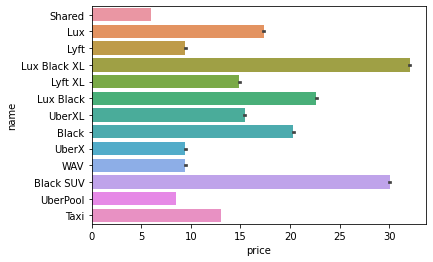

In [26]:
sns.barplot(data=df, x='price', y='name')

    dari plot diatas dapat disimpulkan bahwa 3 harga terbesar dari name yaitu Lux Black XL, Black SUV, dan Lux Black

<AxesSubplot:xlabel='price', ylabel='icon'>

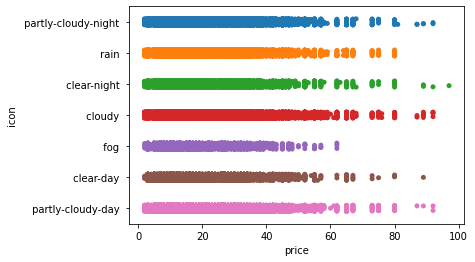

In [27]:
sns.stripplot(data=df, x='price', y='icon')

    dari plot diatas dapat disimpulkan bahwa yang paling banyak clear-night, cloudy bagus, partly cloudy day

In [28]:
# Mengelompokkan dan menghitung jumlah tipe berdasarkan kolom "name"
df.groupby(['cab_type'])['name'].value_counts()

cab_type  name        
Lyft      Lux             51235
          Lux Black       51235
          Lux Black XL    51235
          Lyft            51235
          Lyft XL         51235
          Shared          51233
Uber      Black SUV       55096
          UberXL          55096
          WAV             55096
          Black           55095
          Taxi            55095
          UberX           55094
          UberPool        55091
Name: name, dtype: int64

In [29]:
# Membuat variabel baru 'new_uber' dari dataset df yang mengandung nilai pada kolom 'name'
new_uber = df[df['name'].isin(['Shared', 'UberPool', 'Black SUV', 'UberX', 'Taxi', 'Lux'])]

In [30]:
# Menampilkan semua kolom dalam sebuah dataframe
pd.set_option("display.max.columns",None)

In [31]:
new_uber

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5,0.44,1.0,42.2148,-71.0330,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11,0.44,1.0,42.2148,-71.0330,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
8,4f9fee41-fde3-4767-bbf1-a00e108701fb,1.543818e+09,6,3,12,2018-12-03 06:28:02,America/New_York,Back Bay,Northeastern University,Lyft,lyft_line,Shared,3,1.08,1.0,42.3503,-71.0810,45.58,45.58,Foggy,Foggy in the morning.,0.0000,0.0,0.96,1.25,2.09,1543856400,1.413,57.02,1543852800,33.74,1543921200,56.35,1543852800,28.53,1543914000,fog,44.50,1001.06,307,1.00,0,1.413,290.9,1543838259,1543871628,0.89,0.0004,1543852800,43.09,1543896000,57.02,1543852800,39.90,1543896000,56.35,1543852800
10,9043bf77-1d45-4a93-9520-a083e0277f16,1.543594e+09,16,30,11,2018-11-30 16:13:03,America/New_York,Back Bay,Northeastern University,Lyft,lyft_premier,Lux,13,1.08,1.0,42.3503,-71.0810,40.13,38.00,Clear,Mostly cloudy throughout the day.,0.0000,0.0,0.62,3.46,4.47,1543554000,9.920,42.32,1543600800,31.57,1543665600,40.48,1543611600,28.10,1543658400,clear-day,27.99,1016.84,291,0.12,2,9.920,269.9,1543578871,1543612479,0.79,0.0004,1543593600,28.64,1543579200,42.32,1543600800,29.29,1543579200,40.48,1543611600
14,357559cb-8c58-4278-a41a-e33b2e0997a3,1.544729e+09,19,13,12,2018-12-13 19:15:03,America/New_York,North End,West End,Uber,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,7,1.11,1.0,42.3647,-71.0542,32.85,32.85,Mostly Cloudy,Partly cloudy throughout the day.,0.0000,0.0,0.56,2.65,3.83,1544738400,9.959,33.83,1544731200,27.27,1544781600,32.85,1544734800,24.61,1544785200,partly-cloudy-day,18.66,1033.65,76,0.64,0,9.959,330.8,1544702792,1544735599,0.21,0.0001,1544716800,18.29,1544688000,33.83,1544731200,13.79,1544688000,32.85,1544734800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693063,6c1d9207-a9af-431e-a65f-3d9d205f28bf,1.543728e+09,5,2,12,2018-12-02 05:28:04,America/New_York,Theatre District,Haymarket Square,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,27,1.61,1.0,42.3503,-71.0810,38.19,38.19,Overcast,Light rain until evening.,0.0000,0.0,0.83,2.07,3.50,1543755600,9.698,50.80,1543788000,44.97,1543816800,50.13,1543788000,45.62,1543816800,cloudy,33.58,1021.39,136,1.00,0,9.698,269.8,1543751798,1543785242,0.86,0.0916,15437

In [32]:
new_uber['timestamp'].head()

0     1.544953e+09
1     1.543284e+09
8     1.543818e+09
10    1.543594e+09
14    1.544729e+09
Name: timestamp, dtype: float64

In [33]:
# Convert Timestamp to Datetime value
timestamp1 = 1544952608
timestamp2 = 1543284024
timestamp3 = 1543818483
timestamp4 = 1543594384
timestamp5 = 1544728504
dt_object1 = datetime.fromtimestamp(timestamp1)
dt_object2 = datetime.fromtimestamp(timestamp2)
dt_object3 = datetime.fromtimestamp(timestamp3)
dt_object4 = datetime.fromtimestamp(timestamp4)
dt_object5 = datetime.fromtimestamp(timestamp5)

print("dt_object =", dt_object1)
print("dt_object =", dt_object2)
print("dt_object =", dt_object3)
print("dt_object =", dt_object4)
print("dt_object =", dt_object5)

dt_object = 2018-12-16 16:30:08
dt_object = 2018-11-27 09:00:24
dt_object = 2018-12-03 13:28:03
dt_object = 2018-11-30 23:13:04
dt_object = 2018-12-14 02:15:04


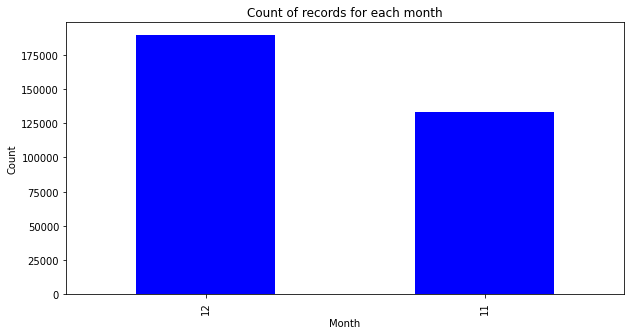

In [34]:
# Bar plot Jumlah Catatan pada dataset per Bulan
new_uber['month'].value_counts().plot(kind='bar', figsize=(10,5), color='blue')
plt.title("Count of records for each month")
plt.xlabel("Month")
plt.ylabel("Count")
plt.show()

    dari barplot count of records for each months diatas disimpulkan bahwa pada bulan ke 12 memiliki jumlah yang lebih tinggi daripada bulan 11

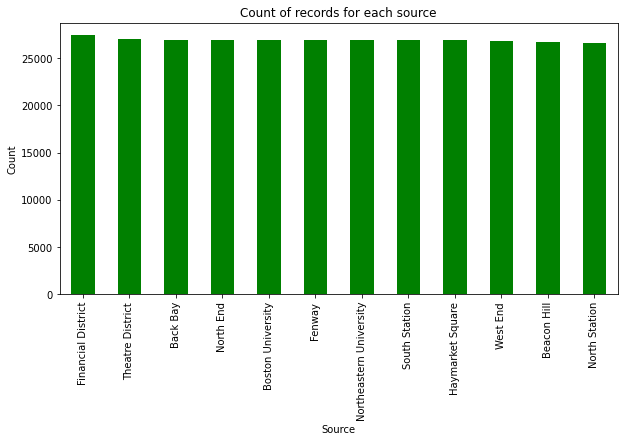

In [35]:
# Bar plot Jumlah Catatan pada dataset per source
new_uber['source'].value_counts().plot(kind='bar', figsize=(10,5), color='green')
plt.title("Count of records for each source")
plt.xlabel("Source")
plt.ylabel("Count")
plt.show()

    dari barplot count of records for each source diatas disimpulkan bahwa jumlah dari setiap source nya tidak jauh berbeda atau relatif sama. Financial district merupakan jumlaah yang paling banyak dituju dalam pemesanan taxi.

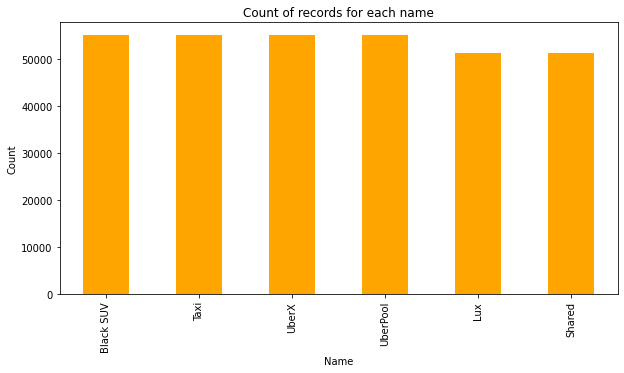

In [36]:
# Bar plot Jumlah Catatan pada dataset per nama
new_uber['name'].value_counts().plot(kind='bar', figsize=(10,5), color='orange')
plt.title("Count of records for each name")
plt.xlabel("Name")
plt.ylabel("Count")
plt.show()

    dari barplot count of records for each name diatas disimpulkan bahwa jumlah dari lux dan shared lebih kecil dibandingkan Black SUV, Taxi,UberX, dan UberPool. Lux dan Shared jumlah nya paling kecil karena Lux dan Shared harganya paling mahal sehingga jumlah nya sedikit

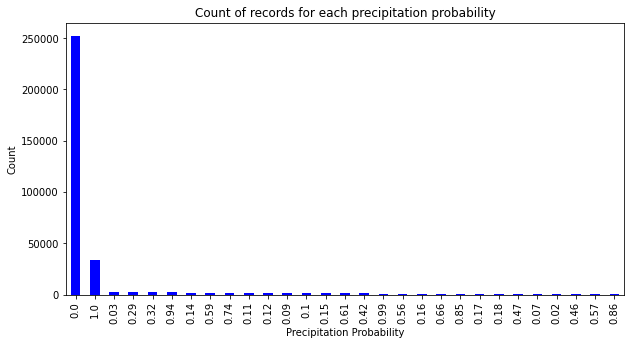

In [37]:
# Bar plot Jumlah Catatan pada dataset per precip Probability
new_uber['precipProbability'].value_counts().plot(kind='bar', figsize=(10,5), color='blue')
plt.title("Count of records for each precipitation probability")
plt.xlabel("Precipitation Probability")
plt.ylabel("Count")
plt.show()

    dari barplot count of records for each precip Probability/kemungkinan terjadinya hujan diatas disimpulkan bahwa jumlah yang terbanyak pada precip Probability 0.0 yang kedua 1.0, sisanya relatif sama. Karena pada kemungkinan 0 artinya tidak hujan lebih banyak dipesan

## Data Preprocessing  Data Cleaning and Transformation

In [38]:
# Membuat Objek LabelEncoder untuk Data Kategorikal
label_encoder = preprocessing.LabelEncoder() 

In [39]:
# Menampilkan tipe data dari setiap fitur (kolom)
new_uber.dtypes

id                              object
timestamp                      float64
hour                             int64
day                              int64
month                            int64
datetime                        object
timezone                        object
source                          object
destination                     object
cab_type                        object
product_id                      object
name                            object
price                            int32
distance                       float64
surge_multiplier               float64
latitude                       float64
longitude                      float64
temperature                    float64
apparentTemperature            float64
short_summary                   object
long_summary                    object
precipIntensity                float64
precipProbability              float64
humidity                       float64
windSpeed                      float64
windGust                 

In [40]:
# Mengubah data kategorikal menjadi numerik
new_uber['id'] = label_encoder.fit_transform(new_uber['id'])
new_uber['datetime'] = label_encoder.fit_transform(new_uber['datetime'])
new_uber['timezone'] = label_encoder.fit_transform(new_uber['timezone'])
new_uber['destination'] = label_encoder.fit_transform(new_uber['destination'])
new_uber['product_id'] = label_encoder.fit_transform(new_uber['product_id'])
new_uber['short_summary'] = label_encoder.fit_transform(new_uber['short_summary'])
new_uber['long_summary'] = label_encoder.fit_transform(new_uber['long_summary'])

In [ ]:
# Mengecek detail kolom mulai dari jumlah, tipe data, dan data null
new_uber.info()

##Kami menghapus kolom adalah sebagai berikut:

-Id: Digunakan hanya untuk catatan unik.
-Datetime, Timestamp: Seperti yang sudah kita ketahui bulan, hari, jam.
-Zona waktu: Hanya satu zona waktu sehingga kami dapat menghapusnya.
-Product_id:Menghapus product_id karena kami sedang mempertimbangkan nama produk.
-Setiap kolom berhubungan dengan cuaca. Saat ini tidak berurusan dengan aspek cuaca dan karenanya menghapus semua kolom terkait.
-bujur dan lintang: karena kami memiliki nama tujuan

In [42]:
new_uber = new_uber.drop(['id', 'datetime', 'timezone', 'timestamp','latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',"product_id",
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperatureMax', 'apparentTemperatureMaxTime'], axis=1)

In [43]:
# Mengkodekan dan mencetak nilai kategorikal pada kolom "cab_type" 
new_uber['cab_type']= label_encoder.fit_transform(new_uber['cab_type'])

print("list of cab_type: ")
for i, item in enumerate(label_encoder.classes_):
    print(item, "-->", i)

list of cab_type: 
Lyft --> 0
Uber --> 1


In [44]:
# Menampilkan tipe data dari setiap fitur (kolom)
new_uber.dtypes

hour                  int64
day                   int64
month                 int64
source               object
destination           int32
cab_type              int32
name                 object
price                 int32
distance            float64
surge_multiplier    float64
dtype: object

In [45]:
for j in ["price"]:
    new_uber.loc[new_uber.loc[:,j].isnull(),j] = new_uber.loc[:,j].mean()
new_uber.price.isnull().sum()

0

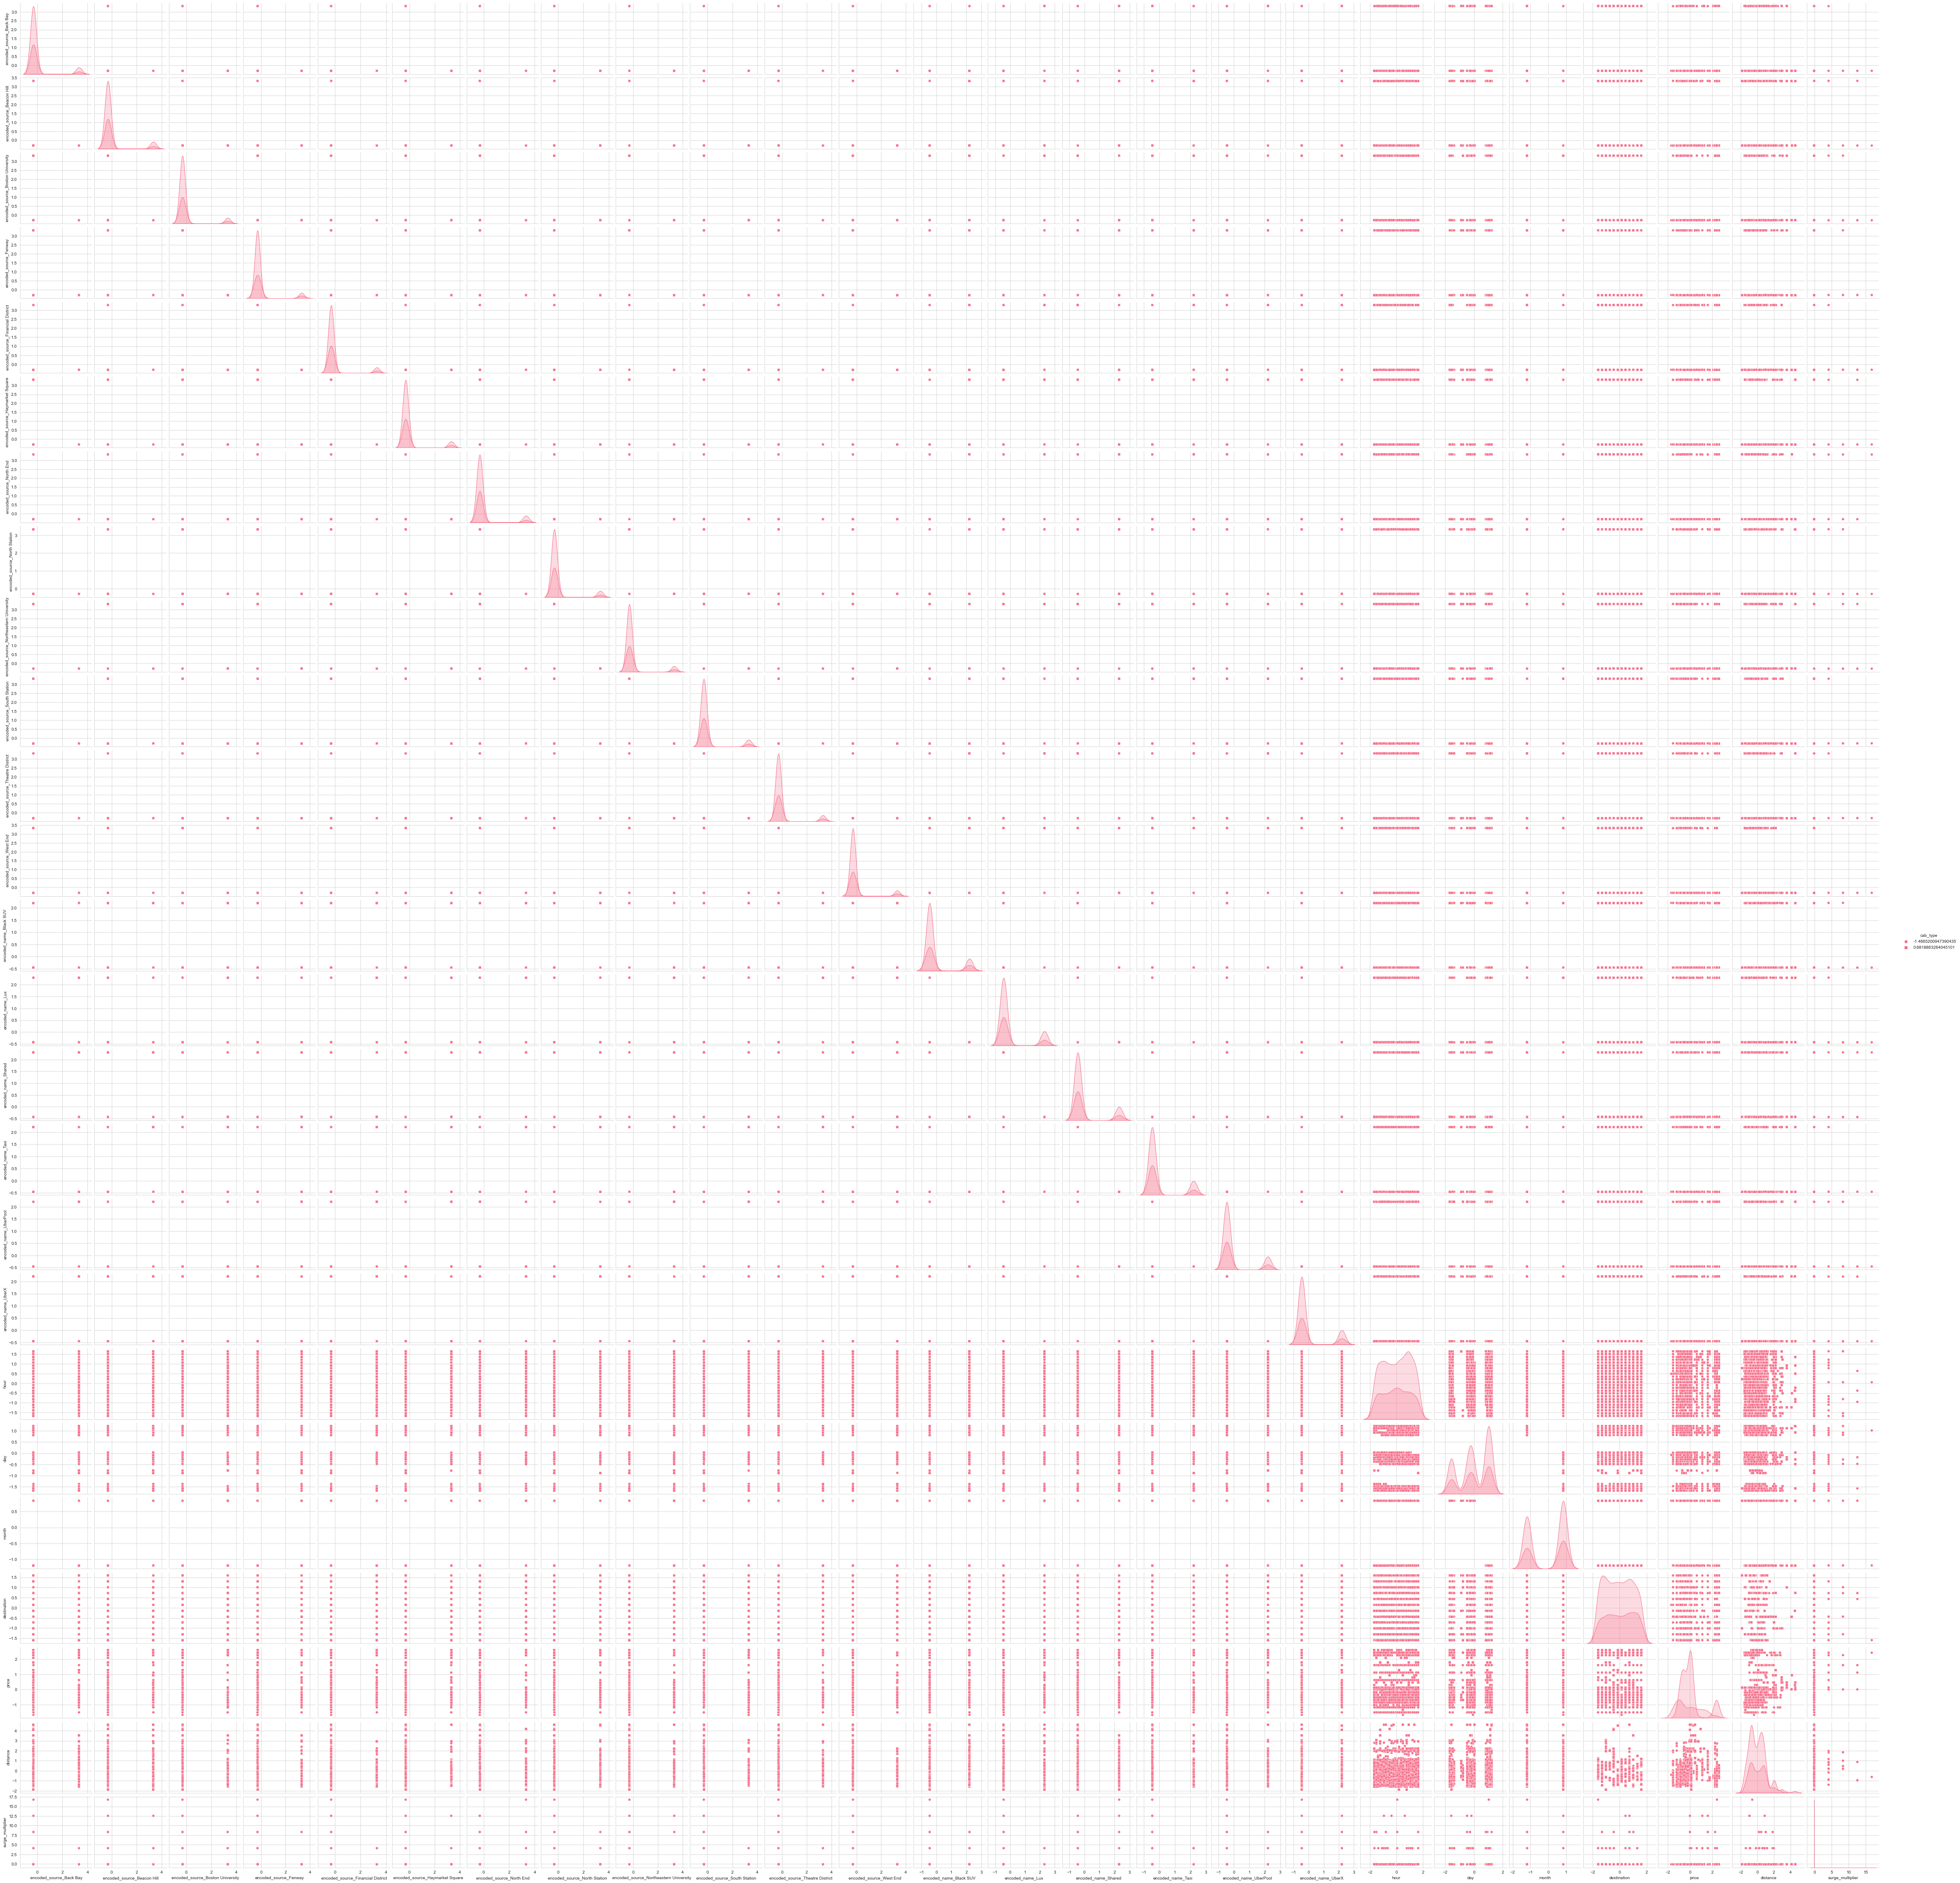

In [111]:
# mengabil 2000 ampel untuk memplotnya. Pairplot mencakup semua plot pencar dan histogram kolom.
sns_pairplot=sns.pairplot(new_uber.sample(2000), hue="cab_type", markers=["o","s"],diag_kind="kde",kind="scatter",palette="husl")


Grafik diagonal mewakili histogram untuk setiap kolom dalam kumpulan data yang dimodifikasi.

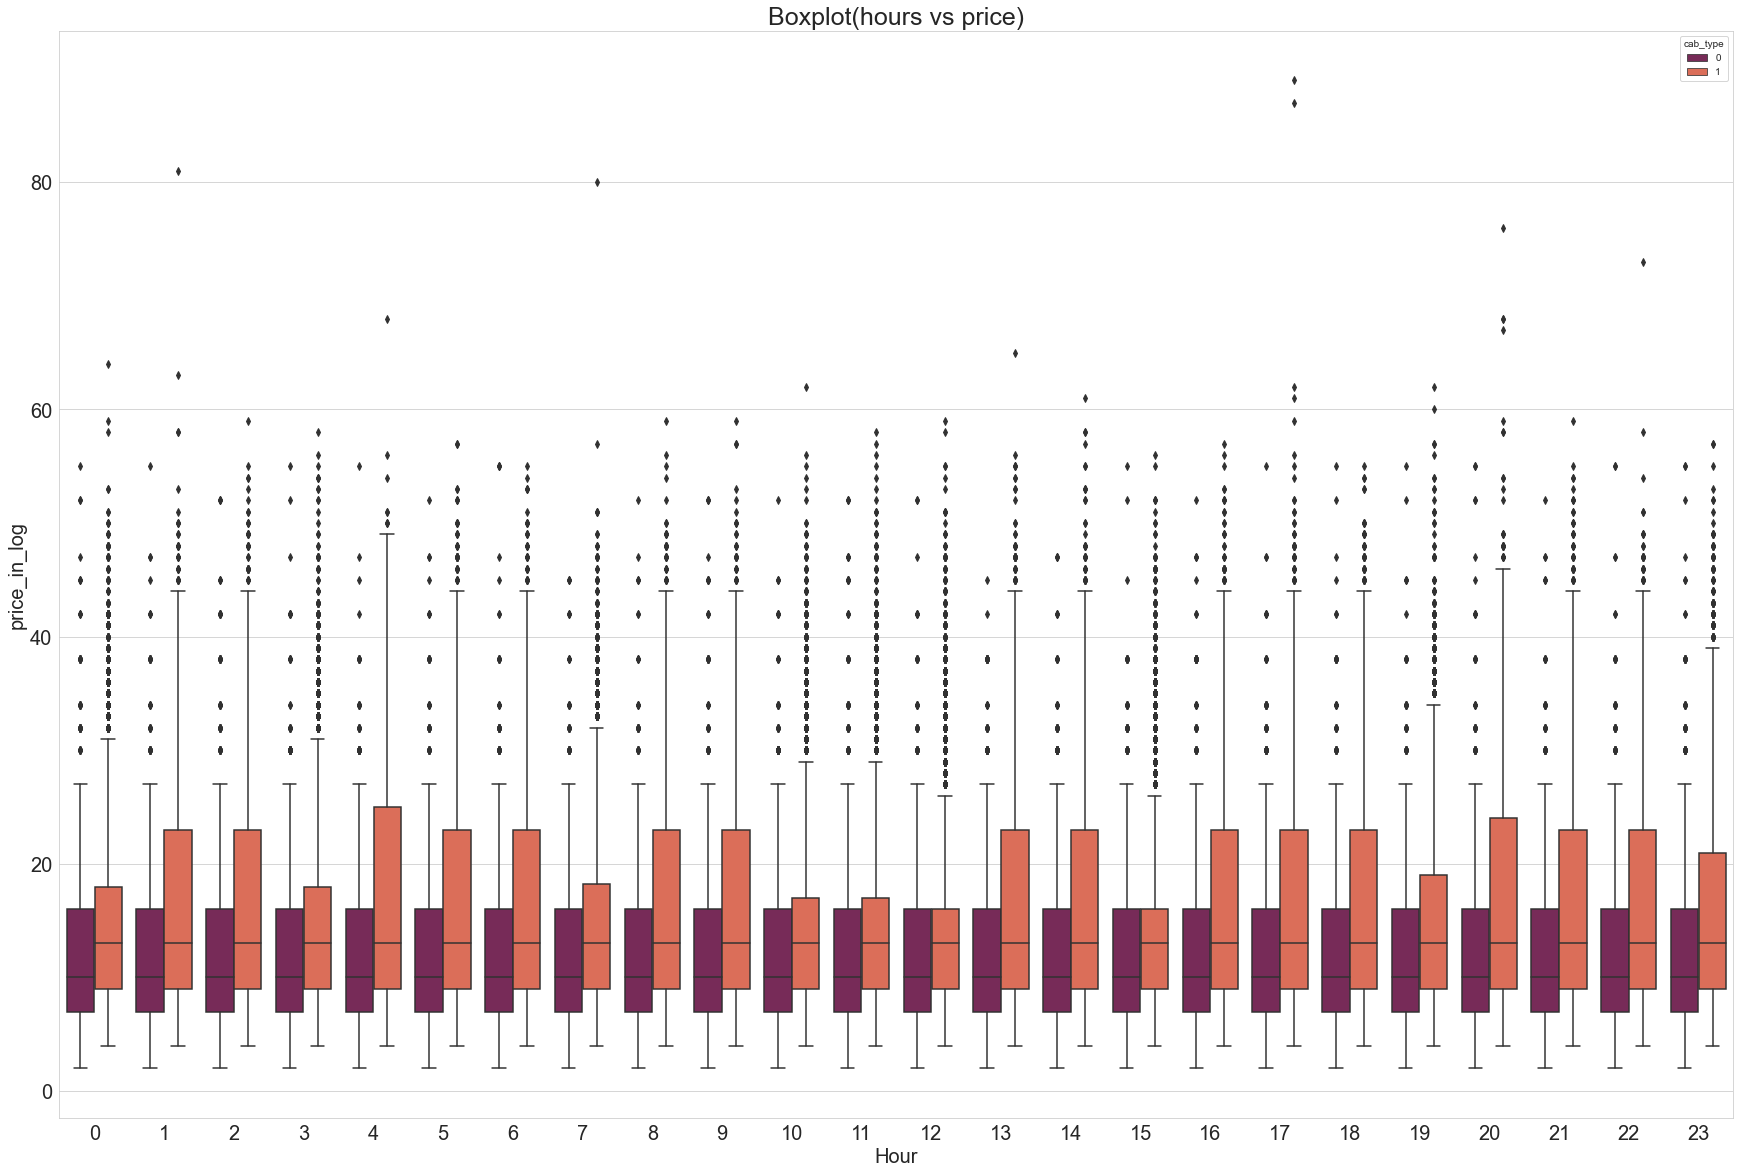

In [47]:
plt.figure(figsize=(30,20))
sns.set_style("whitegrid")
sns.boxplot(x="hour", y="price",data=new_uber, hue="cab_type",palette="rocket")
plt.xticks(fontsize= 20)
plt.yticks(fontsize= 20)
plt.xlabel("Hour",fontsize=20)
plt.ylabel("price_in_log",fontsize=20)
plt.title("Boxplot(hours vs price)",fontsize=25)
plt.show()

Pengamatan:

Histogram: Histogram harga, jarak, dan data kolom surge_nultiplier tampak miring. Kita perlu menerapkan beberapa transformasi untuk membuatnya terdistribusi secara normal.

Scatter Plot: Dengan melihat scatter plot, kita dapat melihat jarak vs harga dan harga vs surge_multiplier tampaknya selaras. Kami akan memplot matriks korelasi lebih lanjut untuk mengekstraksi hubungan yang tepat antara atribut dan label.

Mari plot plot kotak untuk memeriksa apakah ada outlier dalam data atau tidak

In [48]:
from scipy import stats


quantiles = stats.mstats.mquantiles(new_uber["price"], prob=[0.25, 0.75])
IQR = stats.iqr(new_uber["price"])
upper = quantiles[1] + (1.5 * IQR)
lower = quantiles[0] - (1.5 * IQR)
new_uber.loc[new_uber["price"] > upper, "price"] = np.nan
new_uber.loc[new_uber["price"] < lower, "price"] = np.nan
new_uber.price.isnull().sum()

28097


Pengamatan:

Kisaran harga lyft selalu lebih tinggi dari uber
Ada banyak outlier yang ada dalam data. apalagi di uber.
Mari bekerja untuk menghilangkan outlier:

Kita bisa melihat 28097 outlier hadir dalam kumpulan data. Kami dapat menghapusnya dengan memasukkan nilai rata-rata

In [49]:
for i in ["price"]:
    new_uber.loc[new_uber.loc[:,i].isnull(),i] = new_uber.loc[:,i].mean()
new_uber.price.isnull().sum()

0

<AxesSubplot:title={'center':'Uber and Lyft Heat Map'}>

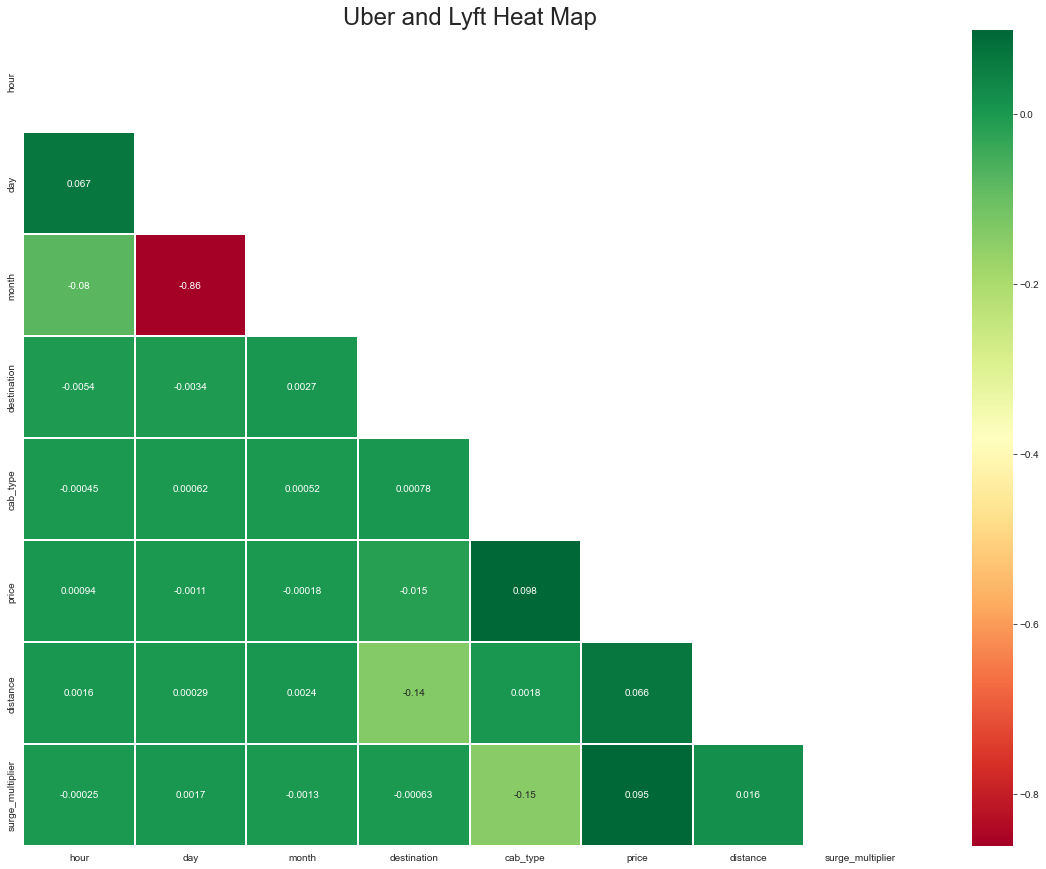

In [50]:
corrmat = new_uber.corr()

fig, ax = plt.subplots(figsize=(20,15))
title = "Uber and Lyft Heat Map"
plt.title(title,fontsize=24)
ttl = ax.title
ttl.set_position([0.5,1.05])
mask = np.triu(np.ones_like(corrmat, dtype=bool))
sns.heatmap(corrmat,mask=mask,annot=True,cmap='RdYlGn',linewidths=0.20,ax=ax)

Penggandaan harga dan kondisi yang sangat berkorelasi Harga dan jarak berkorelasi Jarak dan penggandaan yang tidak berkorelasi kata modif

In [51]:
categorical_cols=new_uber.columns[new_uber.dtypes =='object']
print(categorical_cols)
len(categorical_cols)

Index(['source', 'name'], dtype='object')


2

In [52]:
for i in categorical_cols:
  print(new_uber[i].value_counts())

Financial District         27385
Theatre District           26957
Back Bay                   26915
North End                  26908
Boston University          26908
Fenway                     26904
Northeastern University    26904
South Station              26900
Haymarket Square           26893
West End                   26824
Beacon Hill                26738
North Station              26608
Name: source, dtype: int64
Black SUV    55096
Taxi         55095
UberX        55094
UberPool     55091
Lux          51235
Shared       51233
Name: name, dtype: int64


In [53]:
numeric_cols=new_uber._get_numeric_data().columns
print(numeric_cols)

Index(['hour', 'day', 'month', 'destination', 'cab_type', 'price', 'distance',
       'surge_multiplier'],
      dtype='object')


In [54]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()
data_encode_col = pd.DataFrame(ohe.fit_transform(new_uber[categorical_cols]).toarray(),columns=["encoded_" + x for x in ohe.get_feature_names(categorical_cols)])
data_encode_col.head()
data_other_cols = new_uber.drop(columns=categorical_cols)
new_uber = pd.concat([data_encode_col, data_other_cols], axis=1)

Kita perlu mengubah kolom kategorikal menjadi kolom numerik dengan menggunakan encoding one-hot dan melakukan penskalaan standar pada data numerik.

In [55]:
# Mengambil 5 sample acak dari data
new_uber.sample(5)

,encoded_source_Back Bay,encoded_source_Beacon Hill,encoded_source_Boston University,encoded_source_Fenway,encoded_source_Financial District,encoded_source_Haymarket Square,encoded_source_North End,encoded_source_North Station,encoded_source_Northeastern University,encoded_source_South Station,encoded_source_Theatre District,encoded_source_West End,encoded_name_Black SUV,encoded_name_Lux,encoded_name_Shared,encoded_name_Taxi,encoded_name_UberPool,encoded_name_UberX,hour,day,month,destination,cab_type,price,distance,surge_multiplier
286835,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
518688,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,16.0,12.0,2.0,1.0,9.0,2.62,1.0
554670,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,15.0,12.0,9.0,0.0,7.0,1.71,1.0
682874,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,26.0,11.0,0.0,0.0,13.0,1.50,1.0
116097,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
new_uber = pd.DataFrame(scaler.fit_transform(new_uber),columns=new_uber.columns)

In [57]:
new_uber.sample(5)

,encoded_source_Back Bay,encoded_source_Beacon Hill,encoded_source_Boston University,encoded_source_Fenway,encoded_source_Financial District,encoded_source_Haymarket Square,encoded_source_North End,encoded_source_North Station,encoded_source_Northeastern University,encoded_source_South Station,encoded_source_Theatre District,encoded_source_West End,encoded_name_Black SUV,encoded_name_Lux,encoded_name_Shared,encoded_name_Taxi,encoded_name_UberPool,encoded_name_UberX,hour,day,month,destination,cab_type,price,distance,surge_multiplier
272698,-0.301581,-0.300497,-0.301538,-0.301513,-0.304444,-0.301446,-0.301538,-0.2997,3.316602,-0.301489,-0.301837,-0.301024,-0.453625,2.302442,-0.434311,-0.45362,-0.4536,-0.453615,-1.239887,-1.482621,0.838717,-1.013802,-1.466520,0.619100,0.104313,-0.099556
453650,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.527831,-0.179736,0.838717,-0.434127,-1.466520,-0.366548,-1.112582,-0.099556
394341,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.376053,1.223371,-1.192297,-1.013802,-1.466520,1.604749,0.617147,-0.099556
237478,-0.301581,-0.300497,-0.301538,-0.301513,-0.304444,-0.301446,-0.301538,-0.2997,-0.301513,-0.301489,3.313044,-0.301024,-0.453625,-0.434321,2.302495,-0.45362,-0.4536,-0.453615,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
388756,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.807970,-0.480402,0.838717,1.594733,0.681886,-0.530823,0.547610,-0.099556


In [58]:
new_uber.dtypes

encoded_source_Back Bay                   float64
encoded_source_Beacon Hill                float64
encoded_source_Boston University          float64
encoded_source_Fenway                     float64
encoded_source_Financial District         float64
encoded_source_Haymarket Square           float64
encoded_source_North End                  float64
encoded_source_North Station              float64
encoded_source_Northeastern University    float64
encoded_source_South Station              float64
encoded_source_Theatre District           float64
encoded_source_West End                   float64
encoded_name_Black SUV                    float64
encoded_name_Lux                          float64
encoded_name_Shared                       float64
encoded_name_Taxi                         float64
encoded_name_UberPool                     float64
encoded_name_UberX                        float64
hour                                      float64
day                                       float64


In [59]:
new_uber.isnull().sum()

encoded_source_Back Bay                   172586
encoded_source_Beacon Hill                172586
encoded_source_Boston University          172586
encoded_source_Fenway                     172586
encoded_source_Financial District         172586
encoded_source_Haymarket Square           172586
encoded_source_North End                  172586
encoded_source_North Station              172586
encoded_source_Northeastern University    172586
encoded_source_South Station              172586
encoded_source_Theatre District           172586
encoded_source_West End                   172586
encoded_name_Black SUV                    172586
encoded_name_Lux                          172586
encoded_name_Shared                       172586
encoded_name_Taxi                         172586
encoded_name_UberPool                     172586
encoded_name_UberX                        172586
hour                                      172586
day                                       172586
month               

#Model Defining

In [60]:
new_uber.dropna(inplace=True)
X = new_uber.drop(['price'], axis=1)
y = new_uber['price']

instances = X.shape[0]
features = X.shape[1]

# Converting each dataframe into a numpy array since each dataframe contains only one column
X = np.array(X).reshape(-1, features)
y = np.array(y).reshape(-1, 1)

identity_vector = np.asarray([[1 for num in range(instances)]])
identity_vector = identity_vector.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)
print("Training set mean:", X_train.mean(), y_train.mean())
print("Testing set mean:", X_test.mean(), y_test.mean())
print("Training set standard deviation:", X_train.std(), y_train.std())
print("Testing set standard deviation:", X_test.std(), y_test.std())

imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
X_train = imp_mean.fit_transform(X_train)
X_test = imp_mean.transform(X_test)

Training set shape: (120206, 25) (120206, 1)
Testing set shape: (30052, 25) (30052, 1)
Training set mean: -0.00024957583118249044 0.0006232474354817049
Testing set mean: -0.0005008756691910756 -0.003720189663959522
Training set standard deviation: 1.0006471704591313 1.0015495361782432
Testing set standard deviation: 1.0036790645985911 1.0030373458642095


Set pelatihan memiliki 120.206 baris dan 25 kolom, dan set pengujian memiliki 30.052 baris dan 25 kolom. Nilai dalam tanda kurung setelah bentuk menunjukkan bentuk variabel target, yaitu array 1 dimensi dengan masing-masing 120.206 dan 30.052 elemen dalam set pelatihan dan pengujian.

Deviasi rata-rata dan standar dari set pelatihan masing-masing mendekati nol dan satu, menunjukkan bahwa data telah dibakukan. Deviasi rata-rata dan standar dari set pengujian juga mendekati nol dan satu, tetapi tidak persis sama dengan set pelatihan, yang diharapkan karena set pengujian adalah set data yang terpisah dan tidak terlihat.

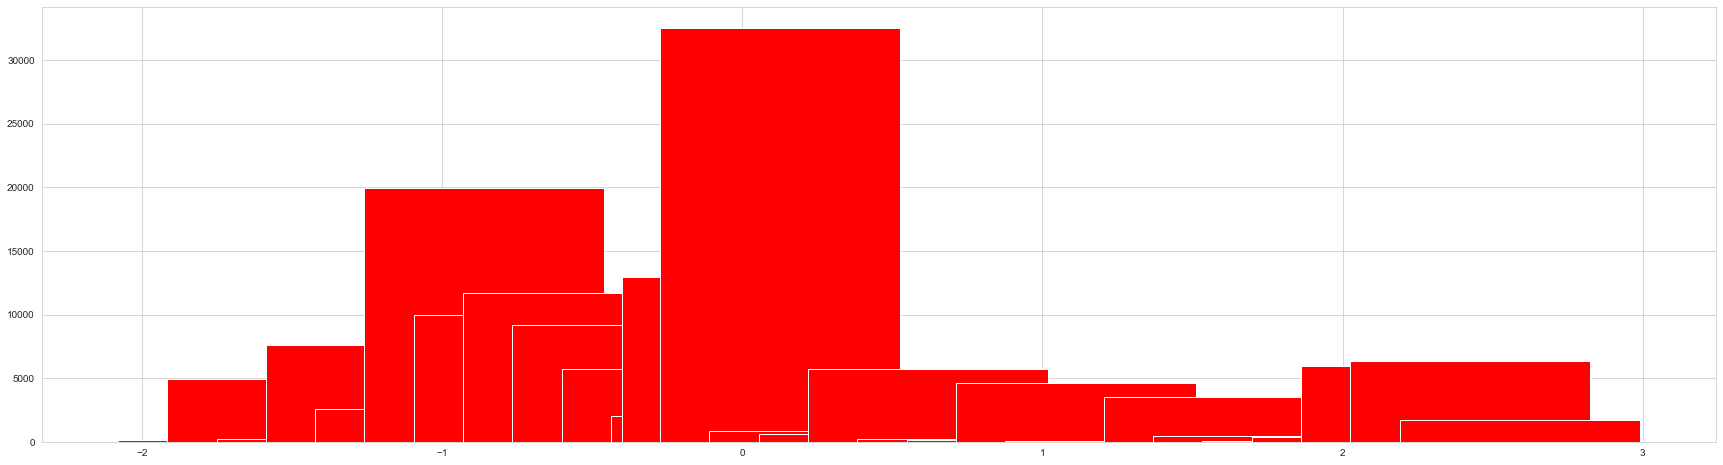

In [61]:
unique_values, counts = np.unique(y, return_counts=True)
plt.figure(figsize=(30,8))
plt.bar(unique_values, counts, color='red')
plt.show()

disimi kita bisa melihat nilai yang unniq dari yang paling tinggi adalah 0 dan -1 

Kita akan membuat beberapa model untuk digunakan dalam memprediksi target variabel. Beberapa model yang akan digunakan antara lain Decision Tree, Random Forest, Linear Regression, GradientBoostingRegressor, Polynomial Regression, dan Grid Search CV.

In [101]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
def evaluate_model(test,pred):
    #print(test,pred)
    print("R^2:", r2_score(test, pred))
    print("MAE:", mean_absolute_error(test,pred))
    print("RMSE:",np.sqrt(mean_squared_error(test, pred)))
    print("")
    
def create_mini_batches(X, y, batch_size):
    mini_batches = []
    data = np.hstack((X, y))
    np.random.shuffle(data)
    n_minibatches = data.shape[0] // batch_size
    i = 0
 
    for i in range(n_minibatches + 1):
        mini_batch = data[i * batch_size:(i + 1)*batch_size, :]
        X_mini = mini_batch[:, :-1]
        Y_mini = mini_batch[:, -1].reshape((-1, 1))
        mini_batches.append((X_mini, Y_mini))
    if data.shape[0] % batch_size != 0:
        mini_batch = data[i * batch_size:data.shape[0]]
        X_mini = mini_batch[:, :-1]
        Y_mini = mini_batch[:, -1].reshape((-1, 1))
        mini_batches.append((X_mini, Y_mini))
    return mini_batches

def perform_lr(X_train,X_test,train_y, test_y):
    #X_train = np.append(X_train,identity_vector[:X_train.shape[0],:],1)
    #X_test = np.append(X_test,identity_vector[:X_test.shape[0],:],1)
    lr = LinearRegression()
    lr.fit(X_train,train_y)
    y_val_pred = lr.predict(X_test)
    y_train_pred = lr.predict(X_train)

    print('Shape:',X_train.shape)
    print('Rank:',np.linalg.matrix_rank(X_train))
    print('coeff:',lr.coef_)
    #Test linear regression model 
    print("Training Loss")
    evaluate_model(train_y,y_train_pred)
    print("Validation Loss")
    evaluate_model(test_y,y_val_pred)
    
def perform_rf(X_train,X_test,train_y, test_y):
    randoms = RandomForestRegressor(n_estimators=50, random_state=0)
    randoms.fit(X_train,train_y)
    y_val_pred = randoms.predict(X_test)
    y_train_pred = randoms.predict(X_train)
    #Test random forest model
    print("Training Loss")
    evaluate_model(train_y,y_train_pred)
    print("Validation Loss")
    evaluate_model(test_y,y_val_pred)
    


def perform_cv(X, y, model, k=5):
    scores = cross_val_score(model, X, y, cv=k, scoring='neg_mean_squared_error')
    rmse = sqrt(mean(absolute(scores)))
    print("Cross validation loss")
    print("RMSE:", rmse)
    print("Scores:", -scores)
    #view RMSE
    return rmse

def perform_gbr(X_train,X_test,train_y,test_y):
    gbr = GradientBoostingRegressor(n_estimators = 200, max_depth = 5, random_state=0)
    gbr.fit(X_train,train_y)
    y_train_pred = gbr.predict(X_train)
    y_val_pred = gbr.predict(X_test)

    # Test Gradient Boosting Regressor model
    print("Training Loss")
    evaluate_model(train_y,y_train_pred)
    print("Validation Loss")
    evaluate_model(test_y,y_val_pred)
    
def perform_sgd(X_train,train_y, X_test, test_y,alpha=0.0001, epsilon=0.1, eta0=0.01,penalty=None,learning_rate='invscaling',batchsize=1):
    print("penalty term:",penalty,",learning rate:",learning_rate,",batch size:",batchsize)
#     print(train_y)
    X_train = np.append(X_train,identity_vector[:X_train.shape[0],:],1)
    X_test = np.append(X_test,identity_vector[:X_test.shape[0],:],1)
#     print(X_train.shape)
#     print('Rank:',np.linalg.matrix_rank(X_train))
    model = SGDRegressor(alpha=alpha, epsilon=epsilon, eta0=eta0,penalty=penalty, learning_rate=learning_rate)
    if batchsize > 1:
        batcherator = create_mini_batches(X_train, train_y,batch_size=batchsize)
        for X_chunk, y_chunk in batcherator:
            y_chunk = y_chunk.squeeze(1)
            model.partial_fit(X_chunk, y_chunk)
    else:
        train_y = train_y.squeeze(1)
        model.fit(X_train, train_y)
        
    y_val_predicted = model.predict(X_test)
    print("validation loss")
    evaluate_model(test_y,y_val_predicted)

    y_train_predicted = model.predict(X_train)
    print("training loss")
    evaluate_model(train_y,y_train_predicted)
    
def perform_dt(X_train,X_test,train_y,test_y):
    decision_tree = DecisionTreeRegressor(random_state=0)
    decision_tree.fit(X_train,train_y)
    y_train_pred = decision_tree.predict(X_train)
    y_val_pred = decision_tree.predict(X_test)

    # Test decision tree model
    print("Training Loss")
    evaluate_model(train_y,y_train_pred)
    print("Validation Loss")
    evaluate_model(test_y,y_val_pred)
    
    # Print score of decision tree model
    score_dt = decision_tree.score(X_test, test_y)
    print("Decision Tree Score:", score_dt)
    
    return perform_cv(X_train, train_y, decision_tree)  # add cross validation on training set



def perform_pr(X_train,X_test,train_y,test_y):
    p = preprocessing.PolynomialFeatures(degree=2)
    X_train_poly = p.fit_transform(X_train)
    X_test_poly = p.fit_transform(X_test)
    X_train_poly = np.append(X_train,identity_vector[:X_train.shape[0],:],1)
    X_test_poly = np.append(X_test,identity_vector[:X_test.shape[0],:],1)
    pr = LinearRegression()
    pr.fit(X_train_poly,train_y)
    y_val_pred = pr.predict(X_test_poly)
    #Test plynomial regression model 
    print("validation loss") 
    evaluate_model(test_y,y_val_pred)


    
def add_poly(X_train,X_test):
    p = preprocessing.PolynomialFeatures(degree=2)
    X_train_poly = p.fit_transform(X_train[:,:7])
    X_test_poly = p.fit_transform(X_test[:,:7])
    X_train_poly = StandardScaler().fit_transform(X_train_poly)
    X_test_poly = StandardScaler().fit_transform(X_test_poly)
#     print(X_train_poly.shape,X_train[:,8:].shape)
    X_train_poly = np.append(X_train_poly,X_train[:,8:],1)
    X_test_poly = np.append(X_test_poly,X_test[:,8:],1)
    return X_train_poly,X_test_poly
    
def perform_ridge(X_train,train_y,X_test,test_y,alpha=0.5):
    rdg = Ridge(alpha = alpha)
    print("alpha:",alpha)
    rdg.fit(X_train, train_y)
    pred_test_rr= rdg.predict(X_test)
    print("Validation loss")
    evaluate_model(test_y,pred_test_rr)
    y_train_predicted = rdg.predict(X_train)
    print("training loss")
    evaluate_model(train_y,y_train_predicted)

    
def perform_l(X_train,y_train,X_test,test_y,alpha=0.1):
    model_lasso = Lasso(alpha=alpha)
    model_lasso.fit(X_train, y_train) 
    pred_train_lasso= model_lasso.predict(X_test)
    print("alpha:",alpha)
    print("validation loss")
    evaluate_model(test_y,pred_train_lasso)
    y_train_predicted = model_lasso.predict(X_train)
    print("training loss")
    evaluate_model(y_train,y_train_predicted)
  
def perform_en(X_train, y_train,X_test,test_y,alpha=0.1,l1=0.5):
    model = ElasticNet(alpha=alpha,l1_ratio=l1)
    model.fit(X_train, y_train) 
    pred_test = model.predict(X_test)
    print("alpha:",alpha,",l1 ratio:",l1)
    print("validation loss")
    evaluate_model(test_y,pred_test)
    pred_train = model.predict(X_train)

    print("alpha:",alpha,",l1 ratio:",l1)
    print("training loss")
    evaluate_model(y_train,pred_train)

    
def k_fold_closed(X_train,y_train):
    model = Ridge(alpha=0.000000000000000000000000000000001)
#     model = LinearRegression()
    pipeline = Pipeline([('transformer', StandardScaler()), ('estimator', model)])
#     pipeline = Pipeline([('transformer', StandardScaler()), ('model', TransformedTargetRegressor(regressor=model,transformer=StandardScaler()))])

    
    cv = KFold(n_splits=4, random_state=20, shuffle=True)
    
    print('Rank:',np.linalg.matrix_rank(X_train))
#     X_train = np.append(X_train,identity_vector[:X_train.shape[0],:],1)
    print('Rank:',np.linalg.matrix_rank(X_train))
    print('Shape:',X_train.shape)
#     X_train = StandardScaler().fit_transform(X_train)
    scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error',
                             cv=cv, n_jobs=-1)
    print(X_train)
    print(scores)
    #view RMSE
    return sqrt(mean(absolute(scores)))
    
def k_fold_sgd(X_train,train_y):
    cv = KFold(n_splits=4, random_state=1, shuffle=True)
    model = SGDRegressor()
    sgd_x = StandardScaler().fit_transform(X_train)
    sgd_y = train_y.squeeze(1)
    sgd_x = np.append(sgd_x,identity_vector[:sgd_x.shape[0],:],1)
    scores = cross_val_score(model, sgd_x, sgd_y, scoring='neg_mean_absolute_error',
                             cv=cv, n_jobs=-1)
    print(scores)
    #view RMSE
    return sqrt(mean(absolute(scores)))

In [91]:
#Train model using linear regression(closed form)
perform_lr(X_train,X_test,y_train, y_test)

Shape: (120206, 25)
Rank: 23
coeff: [[ 3.69798685e+09  3.68690944e+09  3.69754967e+09  3.69729982e+09
   3.72717163e+09  3.69661260e+09  3.69754967e+09  3.67874293e+09
   3.69729982e+09  3.69704994e+09  3.70060839e+09  3.69229766e+09
  -3.84238990e+09 -3.73193205e+09 -3.73187295e+09 -3.84236220e+09
  -3.84225142e+09 -3.84233451e+09  7.03662634e-04 -8.99851322e-03
  -4.68930602e-03 -7.93293118e-03  1.13668054e-01  6.75558895e-02
   1.11683339e-01]]
Training Loss
R^2: 0.027004867195604132
MAE: 0.7289894409091905
RMSE: 0.9879336269939712

Validation Loss
R^2: 0.023997495685684322
MAE: 0.734152840089981
RMSE: 0.990929070486841



Bentuk dataset adalah (120206, 25), yang menunjukkan bahwa terdapat 120206 baris dan 25 kolom data. Peringkat model regresi adalah 23, artinya model tersebut telah menentukan hanya 23 dari 25 fitur yang berguna dalam memprediksi variabel target.

Koefisien model regresi dicetak, menunjukkan bobot yang diberikan pada setiap fitur dalam memprediksi variabel target. Kerugian pelatihan dan validasi juga dicetak, yang meliputi R^2 (koefisien determinasi, yang mengukur seberapa cocok garis regresi dengan data), MAE (rata-rata kesalahan absolut, yang mengukur perbedaan absolut rata-rata antara nilai prediksi dan aktual ), dan RMSE (root mean squared error, yang mengukur standar deviasi dari error).

Hasilnya menunjukkan bahwa model regresi linier memiliki skor R^2 yang rendah baik untuk data pelatihan maupun validasi, yang menunjukkan bahwa model tersebut memiliki kecocokan yang buruk dengan data. Nilai MAE dan RMSE juga relatif tinggi, menandakan bahwa prediksi model tidak akurat

In [92]:
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
perform_gbr(X_train,X_test,y_train, y_test)

Training Loss
R^2: 0.10636526064442886
MAE: 0.7182578970417789
RMSE: 0.9467873698702612

Validation Loss
R^2: 0.10364486698091058
MAE: 0.7237141797526434
RMSE: 0.9496359741651874



kinerja model regresi linier pada set pelatihan dan validasi. Set pelatihan n_estimators = 200, max_depth = 5,.  menunjukkan bahwa mungkin ada beberapa multikolinearitas antara fitur-fiturnya.

Koefisien model dicetak, menunjukkan bobot yang ditetapkan untuk setiap fitur. Kerugian pelatihan dan validasi dihitung menggunakan tiga metrik: R-squared, MAE (mean absolute error), dan RMSE (root mean squared error).

Dalam hal ini, nilai R-kuadrat rendah, menunjukkan bahwa model tidak menjelaskan banyak varian dalam data. Nilai MAE dan RMSE relatif tinggi, menunjukkan bahwa model tidak akurat memprediksi variabel target.

Secara keseluruhan, model regresi linier ini tampaknya tidak cocok untuk data, seperti yang ditunjukkan oleh nilai R-kuadrat yang rendah dan nilai MAE dan RMSE yang relatif tinggi.

In [103]:
perform_dt(X_train,X_test,y_train, y_test)

Training Loss
R^2: 0.9872877161921619
MAE: 0.012055708282050503
RMSE: 0.11292347239684516

Validation Loss
R^2: -0.8869428954068872
MAE: 0.9374150034734539
RMSE: 1.3778326820555884

Cross validation loss
RMSE: 1.3741539391830828
Scores: [1.89454569 1.90882508 1.91821425 1.83807784 1.88183239]


1.3741539391830828

Dalam set pelatihan, model mencapai kinerja tinggi dengan skor R^2 0,987, yang menunjukkan bahwa model tersebut menjelaskan 98,7% varian dalam variabel target. Skor MAE adalah 0,012, yang menunjukkan bahwa perbedaan rata-rata antara nilai prediksi dan aktual sangat rendah. Skor RMSE sebesar 0,112 yang menunjukkan bahwa prediksi model sangat mendekati nilai sebenarnya.

Namun, kinerja pada set validasi tidak begitu baik. Skor R^2 negatif, yang menunjukkan bahwa model sama sekali tidak menjelaskan varians dalam variabel target. Skor MAE adalah 0,937, yang menunjukkan bahwa rata-rata prediksi model meleset hampir 1. Skor RMSE adalah 1,377, yang menunjukkan bahwa prediksi model rata-rata berjarak 1,377 unit dari nilai sebenarnya.

Terakhir, hasil validasi silang ditampilkan. Performa model dievaluasi menggunakan validasi silang 5 kali lipat, dan skor RMSE dilaporkan. Skor untuk setiap lipatan juga disediakan, dan rata-rata skor ini dilaporkan sebagai skor validasi silang akhir. Skor RMSE yang dilaporkan sebesar 1,374 menunjukkan bahwa prediksi model rata-rata berjarak 1,374 unit dari nilai sebenarnya.

In [94]:
from sklearn.linear_model import SGDRegressor
perform_sgd(X_train,y_train, X_test, y_test,penalty='elasticnet',learning_rate='constant',batchsize=5)
perform_sgd(X_train,y_train, X_test, y_test,penalty='l1',learning_rate='optimal',batchsize=10)
perform_sgd(X_train,y_train, X_test, y_test,penalty='l2',learning_rate='adaptive',batchsize=100)
perform_sgd(X_train,y_train, X_test, y_test,penalty='l2',learning_rate='invscaling',batchsize=50)
perform_sgd(X_train,y_train, X_test, y_test)

penalty term: elasticnet ,learning rate: constant ,batch size: 5
validation loss
R^2: -0.13465997915105454
MAE: 0.7627221001795661
RMSE: 1.0684395895475114

training loss
R^2: -0.11817355592454959
MAE: 0.757567933975569
RMSE: 1.0590757959116595

penalty term: l1 ,learning rate: optimal ,batch size: 10
validation loss
R^2: -7.303201970277446e+23
MAE: 520266415765.49084
RMSE: 857183413648.8645

training loss
R^2: -6.861162224977251e+23
MAE: 519801817159.4235
RMSE: 829604841912.1277

penalty term: l2 ,learning rate: adaptive ,batch size: 100
validation loss
R^2: -0.21384344911236752
MAE: 0.8307465288922662
RMSE: 1.1050920197650906

training loss
R^2: -0.20590702879884137
MAE: 0.8285456127549016
RMSE: 1.099839587119081

penalty term: l2 ,learning rate: invscaling ,batch size: 50
validation loss
R^2: 0.016461073173394958
MAE: 0.7315941256142535
RMSE: 0.9947475540149572

training loss
R^2: 0.018271171069351833
MAE: 0.7273050390236551
RMSE: 0.9923576143699907

penalty term: None ,learning rat

hasil pelatihan dan validasi yang berbeda untuk kombinasi hyperparameter yang berbeda dari model pembelajaran mesin. Hasil menunjukkan nilai koefisien R-squared (R^2), mean absolute error (MAE), dan root mean squared error (RMSE) untuk masing-masing model.

Pada rangkaian hasil pertama, istilah penalti yang digunakan adalah jaring elastis, laju pembelajaran konstan, dan ukuran kumpulan adalah 5. Model berkinerja buruk pada data pelatihan dan validasi, dengan nilai R^2 negatif dan MAE dan RMSE tinggi nilai-nilai.

Pada hasil set kedua, istilah penalti yang digunakan adalah L1, tingkat pembelajaran optimal, dan ukuran batch adalah 10. Model bekerja lebih buruk daripada set pertama, dengan nilai R^2 negatif yang sangat besar dan MAE dan MAE yang sangat tinggi. nilai RMSE.

Pada hasil set ketiga, istilah penalti yang digunakan adalah L2, kecepatan pembelajarannya adaptif, dan ukuran batch adalah 100. Model bekerja lebih baik daripada dua set pertama, tetapi masih kurang baik, dengan nilai R^2 negatif dan nilai MAE dan RMSE yang relatif tinggi.

Pada hasil set keempat, istilah penalti yang digunakan adalah L2, laju pembelajaran invscaling, dan ukuran batch adalah 50. Performa model sedikit lebih baik daripada set ketiga, dengan nilai R^2 positif, MAE lebih rendah, dan nilai RMSE .

Pada hasil set kelima, tidak ada istilah penalti, kecepatan pembelajaran invscaling, dan ukuran batch adalah 1. Model bekerja serupa dengan set keempat, dengan nilai R^2 positif dan nilai MAE dan RMSE yang relatif rendah.

In [95]:
#Train model using polynomial regression(Closed form)

perform_pr(X_train,X_test, y_train,y_test)

validation loss
R^2: 0.023997414288525643
MAE: 0.7341529949948347
RMSE: 0.990929111807846



skor R^2 untuk set validasi adalah 0,023997414288525643, yang relatif rendah. R^2 adalah ukuran proporsi varian dalam variabel target yang dapat dijelaskan oleh model. Skor R^2 sebesar 1,0 menunjukkan kecocokan yang sempurna, sedangkan skor 0,0 menunjukkan bahwa model tersebut tidak menjelaskan varians dalam variabel target. Oleh karena itu, skor 0,023997414288525643 menunjukkan bahwa model tidak sangat cocok untuk data.

MAE (mean absolute error) untuk set validasi adalah 0,7341529949948347. MAE mengukur perbedaan absolut rata-rata antara nilai prediksi dan aktual dari variabel target. Dalam hal ini, perbedaan absolut rata-rata relatif rendah, menunjukkan bahwa model membuat prediksi yang cukup akurat pada set validasi.

Terakhir, RMSE (root mean squared error) untuk set validasi adalah 0,990929111807846. RMSE mirip dengan MAE, tetapi menghukum kesalahan yang lebih besar dengan lebih berat. RMSE yang lebih rendah menunjukkan bahwa model membuat prediksi yang lebih akurat. Dalam hal ini, RMSE relatif rendah, menunjukkan bahwa model membuat prediksi yang cukup akurat pada set validasi

In [96]:
#Train model using polynomial regression(SGD)

#Add polynomial features
X_train_poly,X_test_poly = add_poly(X_train,X_test)

perform_sgd(X_train_poly,y_train, X_test_poly, y_test,penalty='elasticnet',learning_rate='constant',batchsize=5)
perform_sgd(X_train_poly,y_train, X_test_poly, y_test,penalty='l1',learning_rate='optimal',batchsize=10)
perform_sgd(X_train_poly,y_train, X_test_poly, y_test,penalty='l2',learning_rate='adaptive',batchsize=100)
perform_sgd(X_train_poly,y_train, X_test_poly, y_test)

penalty term: elasticnet ,learning rate: constant ,batch size: 5
validation loss
R^2: -0.4144499694141379
MAE: 0.9012011519564823
RMSE: 1.192918842968463

training loss
R^2: -0.39702503046262594
MAE: 0.8955943367887299
RMSE: 1.183789620861781

penalty term: l1 ,learning rate: optimal ,batch size: 10
validation loss
R^2: -6.556661683849497e+24
MAE: 2102950284117.1648
RMSE: 2568375336790.053

training loss
R^2: -6.529213872953839e+24
MAE: 2092389777629.3694
RMSE: 2559192070991.706

penalty term: l2 ,learning rate: adaptive ,batch size: 100
validation loss
R^2: -0.3207234895284461
MAE: 0.8708706671782644
RMSE: 1.1527179455012446

training loss
R^2: -0.30170330580487925
MAE: 0.8646530561226072
RMSE: 1.1426900297136873

penalty term: None ,learning rate: invscaling ,batch size: 1
validation loss
R^2: 0.012738085399616628
MAE: 0.7349900389298549
RMSE: 0.9966284836095468

training loss
R^2: 0.017621397576854103
MAE: 0.7295375438597764
RMSE: 0.9926859642131605



In [97]:
#Implement k fold with closed form using linear regression model
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import sqrt
from numpy import absolute
k_fold_closed(X_train, y_train)

Rank: 23
Rank: 23
Shape: (120206, 25)
[[-0.30158062 -0.30049749 -0.30153783 ... -1.46652009  0.23469441
  -0.09955628]
 [ 3.31586294 -0.30049749 -0.30153783 ...  0.68188633  0.13038912
  -0.09955628]
 [-0.30158062 -0.30049749 -0.30153783 ... -1.46652009  0.16515755
  -0.09955628]
 ...
 [-0.30158062 -0.30049749 -0.30153783 ...  0.68188633 -0.42590576
  -0.09955628]
 [-0.30158062  3.32781477 -0.30153783 ...  0.68188633 -1.37334547
  -0.09955628]
 [-0.30158062 -0.30049749  3.31633344 ...  0.68188633 -0.72143741
  -0.09955628]]
[-0.73307736 -0.73225536 -0.72835093 -0.72304894]


0.8539222144987617

Nilai dalam kumpulan data tampaknya dibakukan karena berpusat di sekitar 0 (seperti yang ditunjukkan oleh nilai negatif) dan memiliki rentang yang serupa.

Blok kode kedua menunjukkan larik 4 nilai, yang tampaknya merupakan nilai R^2 yang divalidasi silang yang diperoleh dengan menjalankan validasi silang k-fold dengan penurunan gradien stokastik pada kumpulan data ini.

Nilai terakhir, 0,8539222144987617, tampaknya merupakan rata-rata dari 4 nilai R^2 yang divalidasi silang, yang menunjukkan bahwa model memiliki kecocokan yang baik dengan data.

In [98]:
#Impleexplanation this ment k fold with sgd using linear regression model
k_fold_sgd(X_train,y_train)

[-0.72889035 -0.73605125 -0.72683444 -0.73167783]


0.8549055320189174

Baris pertama dari output menunjukkan skor rata-rata (R2) yang diperoleh untuk setiap k fold, dengan k=4. Nilainya adalah -0.72889035, -0.73605125, -0.72683444, dan -0.73167783. Nilai-nilai ini mewakili kebaikan model untuk setiap lipatan, dengan skor 1,0 berarti sangat cocok, dan skor yang lebih rendah menunjukkan kecocokan yang lebih buruk.

Baris kedua dari output menunjukkan skor rata-rata (R2) dari validasi silang k-fold. Nilai ini adalah 0,8549055320189174, yang mewakili performa keseluruhan model di semua lipatan. Skor yang lebih tinggi menunjukkan kinerja yang lebih baik, dengan 1.0 yang cocok.

Singkatnya, output ini menunjukkan bahwa model tersebut mungkin tidak berkinerja baik, karena skor R2 untuk setiap lipatan negatif, dan skor rata-ratanya relatif rendah.

In [99]:
#randoms forest
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
perform_rf(X_train, X_test, y_train, y_test)

Training Loss
R^2: 0.8429603262755154
MAE: 0.29523981822917345
RMSE: 0.39689636946972273

Validation Loss
R^2: -0.03900794038004807
MAE: 0.7878409932882221
RMSE: 1.0224134088800454



Training loss menunjukkan bahwa model memiliki kecocokan yang baik dengan nilai R^2 sebesar 0,84 yang menunjukkan bahwa 84% varians pada variabel target dapat dijelaskan oleh model. Nilai MAE dan RMSE menunjukkan bahwa selisih rata-rata antara nilai prediksi dan aktual masing-masing adalah 0,295 dan 0,397.

Namun, hilangnya validasi menunjukkan bahwa model tidak bekerja dengan baik pada data yang tidak terlihat dengan nilai R^2 sebesar -0,039, yang menunjukkan bahwa model berkinerja lebih buruk daripada model dasar. Nilai MAE dan RMSE juga tinggi, menunjukkan perbedaan besar antara nilai prediksi dan aktual.

Oleh karena itu, dapat disimpulkan bahwa model overfitting pada data pelatihan dan perlu diperbaiki agar dapat bekerja dengan baik pada data yang tidak terlihat.

In [102]:
#GradientBoostingRegressor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
perform_gbr(X_train, X_test, y_train, y_test)

Training Loss
R^2: 0.15037464439103387
MAE: 0.7043110914042832
RMSE: 0.9231795307876858

Validation Loss
R^2: 0.09147120367012307
MAE: 0.731731643057893
RMSE: 0.9560628694280702



model metrik pelatihan dan validasi menunjukkan bahwa model regresi tidak berjalan dengan baik dan perlu perbaikan.

In [104]:
perform_ridge(X_train,y_train,X_test,y_test,alpha=0.000000001)
perform_ridge(X_train,y_train,X_test,y_test,alpha=0.5)
perform_ridge(X_train,y_train,X_test,y_test,alpha=5)
perform_ridge(X_train,y_train,X_test,y_test,alpha=1000)

alpha: 1e-09
Validation loss
R^2: 0.02396407004419887
MAE: 0.7341319237505763
RMSE: 0.9909460387610595

training loss
R^2: 0.027013802100471107
MAE: 0.7289501743445164
RMSE: 0.9879290909418682

alpha: 0.5
Validation loss
R^2: 0.02396409021791257
MAE: 0.7341318456282956
RMSE: 0.9909460285201138

training loss
R^2: 0.027013802099875472
MAE: 0.7289501029780521
RMSE: 0.9879290909421706

alpha: 5
Validation loss
R^2: 0.023964271714777996
MAE: 0.7341311425620558
RMSE: 0.9909459363853856

training loss
R^2: 0.027013802040898982
MAE: 0.7289494608388681
RMSE: 0.9879290909721118

alpha: 1000
Validation loss
R^2: 0.024001520008071542
MAE: 0.7339784073828794
RMSE: 0.9909270275504061

training loss
R^2: 0.027011467640140063
MAE: 0.7288102412933849
RMSE: 0.987930276097369



model yang dilatih menggunakan nilai yang berbeda dari parameter regularisasi alfa, dan metrik evaluasi yang digunakan adalah R^2, MAE, dan RMSE untuk set pelatihan dan validasi. Nilai alpha yang digunakan dalam percobaan adalah 1e-09, 0,5, 5, dan 1000.

Hasilnya menunjukkan bahwa peningkatan alfa tampaknya tidak berdampak signifikan pada performa model, karena nilai R^2, MAE, dan RMSE untuk set pelatihan dan validasi konsisten di semua nilai alfa. Namun, nilai R^2 cukup rendah, menunjukkan bahwa model tersebut tidak menjelaskan jumlah varians yang signifikan dalam data.

Secara keseluruhan, hasil ini menunjukkan bahwa model tersebut mungkin tidak cocok untuk data, dan eksperimen atau modifikasi lebih lanjut mungkin diperlukan untuk meningkatkan kinerjanya.

In [105]:
from sklearn.linear_model import Lasso
#Perform Regularization(Lasso)
  
perform_l(X_train, y_train,X_test,y_test,alpha=0.0000000001)
perform_l(X_train, y_train,X_test,y_test,alpha=0.1)
perform_l(X_train, y_train,X_test,y_test,alpha=5)
perform_l(X_train, y_train,X_test,y_test,alpha=100)

alpha: 1e-10
validation loss
R^2: 0.02396407006132606
MAE: 0.7341319237176931
RMSE: 0.9909460387523651

training loss
R^2: 0.027013802100471107
MAE: 0.728950174319649
RMSE: 0.9879290909418682

alpha: 0.1
validation loss
R^2: -1.875136409013045e-05
MAE: 0.7292286548199562
RMSE: 1.0030467499793587

training loss
R^2: 0.0
MAE: 0.7254681347920621
RMSE: 1.0015495361782432

alpha: 5
validation loss
R^2: -1.875136409013045e-05
MAE: 0.7292286548199562
RMSE: 1.0030467499793587

training loss
R^2: 0.0
MAE: 0.7254681347920621
RMSE: 1.0015495361782432

alpha: 100
validation loss
R^2: -1.875136409013045e-05
MAE: 0.7292286548199562
RMSE: 1.0030467499793587

training loss
R^2: 0.0
MAE: 0.7254681347920621
RMSE: 1.0015495361782432



model regresi linier yang dilatih dengan kekuatan regularisasi yang berbeda (nilai alfa) pada kumpulan data. Metrik dihitung pada set pelatihan dan validasi. Berikut arti setiap metrik:

R^2 (koefisien determinasi) mengukur proporsi varian dalam variabel dependen yang dapat diprediksi dari variabel independen. Ini berkisar antara 0 dan 1, dan nilai yang lebih tinggi menunjukkan kinerja yang lebih baik.
MAE (mean absolute error) mengukur perbedaan absolut rata-rata antara nilai prediksi dan aktual dari variabel dependen. Ini adalah nilai non-negatif, dan nilai yang lebih rendah menunjukkan kinerja yang lebih baik.
RMSE (root mean squared error) mengukur akar kuadrat dari selisih kuadrat rata-rata antara nilai prediksi dan aktual dari variabel dependen. Ini adalah nilai non-negatif, dan nilai yang lebih rendah menunjukkan kinerja yang lebih baik.
Melihat hasilnya, sepertinya nilai alpha yang lebih kecil (1e-10 dan 1e-09) menghasilkan kinerja yang lebih baik, seperti yang ditunjukkan oleh skor R^2 yang lebih tinggi dan nilai MAE dan RMSE yang lebih rendah. Namun, ketika alfa dinaikkan menjadi 0,1 dan seterusnya, kinerja turun secara signifikan, dengan skor R^2 negatif dan nilai MAE dan RMSE yang lebih tinggi, menunjukkan kecocokan model yang buruk.

Ini menunjukkan bahwa nilai alfa yang sangat rendah mungkin optimal untuk set data dan model ini, karena membantu mencegah overfitting dan meningkatkan performa generalisasi model.

In [106]:
from sklearn.linear_model import ElasticNet
#Perform Regularization(Elastic net)
    
perform_en(X_train, y_train,X_test,y_test,alpha=0.0000000001,l1=0.5)
perform_en(X_train, y_train,X_test,y_test,alpha=0.1,l1=0.8)
perform_en(X_train, y_train,X_test,y_test,alpha=5,l1=0.5)
perform_en(X_train, y_train,X_test,y_test,alpha=100,l1=0.2)

alpha: 1e-10 ,l1 ratio: 0.5
validation loss
R^2: 0.023964070053005715
MAE: 0.734131923733196
RMSE: 0.9909460387565888

alpha: 1e-10 ,l1 ratio: 0.5
training loss
R^2: 0.027013802100471218
MAE: 0.7289501743312257
RMSE: 0.9879290909418682

alpha: 0.1 ,l1 ratio: 0.8
validation loss
R^2: 0.0071828152138708745
MAE: 0.7289338888426035
RMSE: 0.9994285378812408

alpha: 0.1 ,l1 ratio: 0.8
training loss
R^2: 0.00708310646905197
MAE: 0.7250262750633815
RMSE: 0.9979961918180678

alpha: 5 ,l1 ratio: 0.5
validation loss
R^2: -1.875136409013045e-05
MAE: 0.7292286548199562
RMSE: 1.0030467499793587

alpha: 5 ,l1 ratio: 0.5
training loss
R^2: 0.0
MAE: 0.7254681347920621
RMSE: 1.0015495361782432

alpha: 100 ,l1 ratio: 0.2
validation loss
R^2: -1.875136409013045e-05
MAE: 0.7292286548199562
RMSE: 1.0030467499793587

alpha: 100 ,l1 ratio: 0.2
training loss
R^2: 0.0
MAE: 0.7254681347920621
RMSE: 1.0015495361782432



model regresi linier dengan nilai yang berbeda untuk rasio alfa dan l1 hyperparameter. Model dievaluasi berdasarkan kinerjanya pada set pelatihan dan validasi, menggunakan metrik seperti R-squared, MAE, dan RMSE.

Untuk nilai alpha 1e-10, model bekerja lebih baik, yang ditunjukkan dengan nilai R-squared yang lebih tinggi dan nilai MAE dan RMSE yang lebih rendah, dibandingkan dengan nilai alpha lainnya (0,1, 5, dan 100). Demikian pula, untuk rasio l1 sebesar 0,5, model memiliki kinerja yang lebih baik daripada nilai rasio l1 lainnya (0,2 dan 0,8).

Secara keseluruhan, model tersebut tampaknya tidak berjalan dengan baik, karena nilai R-squared mendekati nol dan nilai MAE dan RMSE relatif tinggi. Mungkin perlu untuk mengeksplorasi jenis model lain atau pendekatan rekayasa fitur untuk meningkatkan kinerja.

In [107]:
perform_ridge(X_train_poly,y_train,X_test_poly,y_test,alpha=0)
perform_ridge(X_train_poly,y_train,X_test_poly,y_test,alpha=0.000000001)
perform_ridge(X_train_poly,y_train,X_test_poly,y_test,alpha=0.5)
perform_ridge(X_train_poly,y_train,X_test_poly,y_test,alpha=5)
perform_ridge(X_train_poly,y_train,X_test_poly,y_test,alpha=1000)

alpha: 0
Validation loss
R^2: -7.481228940747416e+22
MAE: 171376850229.31433
RMSE: 274349122800.94098

training loss
R^2: 0.02626469550865207
MAE: 0.7284516536737676
RMSE: 0.9883093233675515

alpha: 1e-09
Validation loss
R^2: 0.023970701961715135
MAE: 0.7341381310791149
RMSE: 0.9909426721413715

training loss
R^2: 0.027013802100471218
MAE: 0.7289501743445173
RMSE: 0.9879290909418682

alpha: 0.5
Validation loss
R^2: 0.023962932388649216
MAE: 0.7341409952945447
RMSE: 0.9909466162781863

training loss
R^2: 0.02701380209987636
MAE: 0.7289501032498586
RMSE: 0.9879290909421702

alpha: 5
Validation loss
R^2: 0.023963106724632866
MAE: 0.7341402979957905
RMSE: 0.9909465277786474

training loss
R^2: 0.02701380204099657
MAE: 0.7289494635450094
RMSE: 0.9879290909720623

alpha: 1000
Validation loss
R^2: 0.02399879914865588
MAE: 0.733988756934264
RMSE: 0.9909284087878307

training loss
R^2: 0.02701147150855987
MAE: 0.7288107556300338
RMSE: 0.9879302741334564



hasilnya menunjukkan bahwa model tidak berkinerja baik dan kemungkinan overfitting data pelatihan. Penyesuaian lebih lanjut dari parameter regularisasi dan hyperparameter lainnya mungkin diperlukan untuk meningkatkan kinerja model.

In [108]:
perform_en(X_train_poly,y_train,X_test_poly,y_test,alpha=0.0000000001,l1=0.5)
perform_en(X_train_poly,y_train,X_test_poly,y_test,alpha=0.1,l1=0.8)
perform_en(X_train_poly,y_train,X_test_poly,y_test,alpha=5,l1=0.5)
perform_en(X_train_poly,y_train,X_test_poly,y_test,alpha=100,l1=0.2)

alpha: 1e-10 ,l1 ratio: 0.5
validation loss
R^2: 0.023962428132054736
MAE: 0.7341413342466067
RMSE: 0.9909468722578607

alpha: 1e-10 ,l1 ratio: 0.5
training loss
R^2: 0.02701380210047133
MAE: 0.7289501743320915
RMSE: 0.9879290909418681

alpha: 0.1 ,l1 ratio: 0.8
validation loss
R^2: 0.0071828152138708745
MAE: 0.7289338888426035
RMSE: 0.9994285378812408

alpha: 0.1 ,l1 ratio: 0.8
training loss
R^2: 0.00708310646905197
MAE: 0.7250262750633815
RMSE: 0.9979961918180678

alpha: 5 ,l1 ratio: 0.5
validation loss
R^2: -1.875136409013045e-05
MAE: 0.7292286548199562
RMSE: 1.0030467499793587

alpha: 5 ,l1 ratio: 0.5
training loss
R^2: 0.0
MAE: 0.7254681347920621
RMSE: 1.0015495361782432

alpha: 100 ,l1 ratio: 0.2
validation loss
R^2: -1.875136409013045e-05
MAE: 0.7292286548199562
RMSE: 1.0030467499793587

alpha: 100 ,l1 ratio: 0.2
training loss
R^2: 0.0
MAE: 0.7254681347920621
RMSE: 1.0015495361782432



nilai yang berbeda dari hyperparameters alpha dan l1_ratio untuk melatih model menggunakan regresi Lasso. Regresi Lasso adalah teknik regresi linier yang menggunakan regularisasi L1 untuk menambahkan istilah penalti ke fungsi biaya, yang membantu mengurangi overfitting model.

Nilai R-squared (R^2) untuk set validasi dan pelatihan digunakan untuk mengukur kecocokan model. Nilai R^2 berkisar dari 0 hingga 1, dengan nilai yang lebih tinggi menunjukkan kecocokan yang lebih baik. Nilai R^2 negatif menunjukkan bahwa model lebih buruk daripada rata-rata variabel target.

Mean Absolute Error (MAE) dan Root Mean Squared Error (RMSE) digunakan untuk mengukur perbedaan antara nilai prediksi dan aktual dari variabel target. Nilai MAE dan RMSE yang lebih rendah menunjukkan bahwa model berperforma lebih baik.

Melihat hasilnya, tampaknya model dengan nilai alpha 1e-10 dan nilai l1_ratio 0,5 memiliki kinerja terbaik pada set validasi, karena memiliki nilai R^2 tertinggi dan nilai MAE dan RMSE terendah. Hal ini menunjukkan bahwa model menyesuaikan data dengan baik dan membuat prediksi yang akurat.

Namun, beberapa model lain dengan nilai alpha yang lebih tinggi dan nilai l1_ratio yang lebih rendah tampaknya overfitting pada set pelatihan, seperti yang ditunjukkan oleh nilai R^2 yang tinggi dan nilai MAE dan RMSE yang rendah pada set pelatihan, tetapi kinerja yang buruk pada set validasi .

Penting untuk menemukan keseimbangan yang tepat antara nilai alpha dan l1_ratio untuk menghindari overfitting dan memastikan kinerja yang baik pada data baru.

In [109]:
  rdg = Ridge(alpha = 0.000000000000000001)
  print("alpha:",0.000000000000000001)
  rdg.fit(X_train, y_train)
  pred_test_rr= rdg.predict(X_test)

alpha: 1e-18


In [110]:
print(pred_test_rr)

[[ 0.1044771 ]
 [ 0.3841338 ]
 [-0.1043218 ]
 ...
 [ 0.01610532]
 [-0.09984017]
 [-0.25383484]]


nilai target yang diprediksi berada dalam kisaran kira-kira -0,6 hingga 0,6.

# Conclusion
Dari analisis yang telah dilakukan, diperoleh kesimpulan sebagai berikut:

## Kesimpulan terhadap EDA :
* Terdapat 12 tempat asal dan tujuan pada dataset ini. Faktor yang dapat mempengaruhi banyaknya tempat asal dan tujuan antara lain populasi di kota Boston, keberadaan objek wisata atau tempat kerja, serta kondisi geografis dan infrastruktur di Boston.
* Terdapat 2 merek taksi online pada dataset ini, yakni Uber dan Lyft. Faktor yang mempengaruhi banyaknya merek antara lain kepopuleran masing-masing merek di Boston, tingkat persaingan antara kedua merek, serta kualitas layanan dan harga yang ditawarkan.
* Cuaca yang paling sering muncul adalah Overcast, yang dapat disebabkan oleh cuaca yang relatif stabil di Boston atau mungkin karena musim tertentu yang sedang berlangsung.
* Rute paling banyak dipesan adalah Financial District, yang dapat disebabkan oleh faktor populasi yang tinggi di wilayah tersebut atau karena banyaknya tempat kerja atau objek wisata di sekitar Financial District.

## Kesimpulan terhadap Model :

* Berdasarkan hasil dari berbagai nilai rasio alpha dan l1, terlihat bahwa model Ridge Regression dengan nilai alpha 1e-10 dan rasio l1 sebesar 0,5 tampil paling baik pada set validasi, dengan skor R^2 sebesar 0,023962 dan nilai MAE dan RMSE yang relatif rendah. Namun, kinerja model secara keseluruhan masih relatif buruk, seperti yang ditunjukkan oleh skor R^2 yang rendah di semua nilai rasio alfa dan l1.

* Nilai set tes yang diprediksi juga dicetak, menunjukkan nilai prediksi model untuk setiap sampel dalam set tes.

* Secara keseluruhan, mungkin perlu mengeksplorasi teknik pemodelan lain atau rekayasa fitur tambahan untuk meningkatkan kinerja model ini.